**IPL Data Analysis:**  Visualisation & Trends
<br/>
This notebook performs a detailed analysis of the Indian Premier League (IPL) dataset, covering data loading, some cleaning, visualisation, and trend analysis.


## 1. Visualising Dataset

This section focuses on loading the data, initial exploration, cleaning, and creating visualisations to understand the basic characteristics of the dataset.


### 1.1 Load Data

- Load `matches.csv` and `deliveries.csv` into pandas DataFrames
- Necessary libraries are imported for Ploting
- Display the first few rows of each DataFrame


In [ ]:
%pip install pandas numpy matplotlib seaborn tabulate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


In [2]:
# Set plot style
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (14, 8)

# Load datasets
matches_df = pd.read_csv("dataset/matches.csv")
deliveries_df = pd.read_csv("dataset/deliveries.csv")

In [3]:
# Display the first few rows of the Matches DataFrame

print("Matches DataFrame Head:")
print(tabulate(matches_df.head(), headers="keys", tablefmt="fancy_grid"))

Matches DataFrame Head:
╒════╤════════╤══════════╤════════════╤════════════╤══════════════╤═══════════════════╤════════════════════════════════════════════╤═════════════════════════════╤═════════════════════════════╤═════════════════════════════╤═════════════════╤═════════════════════════════╤══════════╤═════════════════╤═══════════════╤════════════════╤══════════════╤══════════╤═══════════╤════════════════╕
│    │     id │ season   │ city       │ date       │ match_type   │ player_of_match   │ venue                                      │ team1                       │ team2                       │ toss_winner                 │ toss_decision   │ winner                      │ result   │   result_margin │   target_runs │   target_overs │ super_over   │   method │ umpire1   │ umpire2        │
╞════╪════════╪══════════╪════════════╪════════════╪══════════════╪═══════════════════╪════════════════════════════════════════════╪═════════════════════════════╪═════════════════════════════╪════════

In [4]:
# Display the first few rows of the Deliveries DataFrame

print("\n\nDeliveries DataFrame Head:")
print(tabulate(deliveries_df.head(), headers="keys", tablefmt="fancy_grid"))



Deliveries DataFrame Head:
╒════╤════════════╤══════════╤═══════════════════════╤═════════════════════════════╤════════╤════════╤═════════════╤══════════╤═══════════════╤════════════════╤══════════════╤══════════════╤═══════════════╤═════════════╤════════════════════╤══════════════════╤═══════════╕
│    │   match_id │   inning │ batting_team          │ bowling_team                │   over │   ball │ batter      │ bowler   │ non_striker   │   batsman_runs │   extra_runs │   total_runs │ extras_type   │   is_wicket │   player_dismissed │   dismissal_kind │   fielder │
╞════╪════════════╪══════════╪═══════════════════════╪═════════════════════════════╪════════╪════════╪═════════════╪══════════╪═══════════════╪════════════════╪══════════════╪══════════════╪═══════════════╪═════════════╪════════════════════╪══════════════════╪═══════════╡
│  0 │     335982 │        1 │ Kolkata Knight Riders │ Royal Challengers Bangalore │      0 │      1 │ SC Ganguly  │ P Kumar  │ BB McCullum   │         

### 1.2 Initial Exploration & Cleaning

- Check the shape (number of rows and columns) of both datasets.
- Get the summary of the data type, unique values and missing values


In [5]:
# Handle missing values


# Updating the 'city' column in matches_df based on the 'venue' column
matches_df.loc[matches_df["venue"].isin([
                "Sharjah Cricket Stadium", 
                "Dubai International Cricket Stadium"]), "city"] = matches_df["venue"].replace(
                    {
                    "Sharjah Cricket Stadium": "Sharjah",
                    "Dubai International Cricket Stadium": "Dubai"
                })




# Data Cleaning
# Mapping city names
matches_df["venue"] = matches_df["venue"].str.split(",").str[0]

matches_df["venue"] = matches_df["venue"].replace(
    {
        "M.Chinnaswamy Stadium": "M Chinnaswamy Stadium",
        "Sardar Patel Stadium": "Narendra Modi Stadium",
        "Punjab Cricket Association Stadium": "Punjab Cricket Association IS Bindra Stadium",
    }
)

matches_df = matches_df.replace(
    {
        "Kings XI Punjab": "Punjab Kings",
        "Delhi Daredevils": "Delhi Capitals",
        "Rising Pune Supergiant": "Rising Pune Supergiants",
        "Deccan Chargers": "Sunrisers Hyderabad",
        "Royal Challengers Bangalore": "Royal Challengers Bengaluru",
    }
)

deliveries_df = deliveries_df.replace(
    {
        "Kings XI Punjab": "Punjab Kings",
        "Delhi Daredevils": "Delhi Capitals",
        "Rising Pune Supergiant": "Rising Pune Supergiants",
        "Deccan Chargers": "Sunrisers Hyderabad",
        "Royal Challengers Bangalore": "Royal Challengers Bengaluru",
    }
)

# Convert 'date' column to datetime objects
matches_df["date"] = pd.to_datetime(matches_df["date"])

In [6]:
# --- Matches DataFrame Exploration ---
print("Matches Shape:", matches_df.shape)

# --- Combined DataFrame Summary ---
print("Combined Summary for Matches DataFrame:")

# Get data types
dtypes = matches_df.dtypes

# Get unique counts
unique_counts = matches_df.nunique()

# Get missing counts
missing_counts = matches_df.isnull().sum()

# Create the summary DataFrame
summary_df = pd.DataFrame(
    {
        "Data Type": dtypes,
        "Unique Values": unique_counts,
        "Missing Values": missing_counts,
    }
)

# Reset index to make 'Column' a column
summary_df = summary_df.reset_index().rename(columns={"index": "Column"})

print(tabulate(summary_df, headers="keys", tablefmt="fancy_grid"))

Matches Shape: (1095, 20)
Combined Summary for Matches DataFrame:
╒════╤═════════════════╤════════════════╤═════════════════╤══════════════════╕
│    │ Column          │ Data Type      │   Unique Values │   Missing Values │
╞════╪═════════════════╪════════════════╪═════════════════╪══════════════════╡
│  0 │ id              │ int64          │            1095 │                0 │
├────┼─────────────────┼────────────────┼─────────────────┼──────────────────┤
│  1 │ season          │ object         │              17 │                0 │
├────┼─────────────────┼────────────────┼─────────────────┼──────────────────┤
│  2 │ city            │ object         │              36 │                0 │
├────┼─────────────────┼────────────────┼─────────────────┼──────────────────┤
│  3 │ date            │ datetime64[ns] │             823 │                0 │
├────┼─────────────────┼────────────────┼─────────────────┼──────────────────┤
│  4 │ match_type      │ object         │               8 │      

In [7]:
# --- Deliveries DataFrame Exploration ---
print("Deliveries Shape:", deliveries_df.shape)

# --- Combined DataFrame Summary ---
print("Combined Summary for Deliveries DataFrame:")

# Get data types
dtypes = deliveries_df.dtypes

# Get unique counts
unique_counts = deliveries_df.nunique()

# Get missing counts
missing_counts = deliveries_df.isnull().sum()

# Create the summary DataFrame
summary_df = pd.DataFrame(
    {
        "Data Type": dtypes,
        "Unique Values": unique_counts,
        "Missing Values": missing_counts,
    }
)

# Reset index to make 'Column' a column
summary_df = summary_df.reset_index().rename(columns={"index": "Column"})

print(tabulate(summary_df, headers="keys", tablefmt="fancy_grid"))

Deliveries Shape: (260920, 17)
Combined Summary for Deliveries DataFrame:
╒════╤══════════════════╤═════════════╤═════════════════╤══════════════════╕
│    │ Column           │ Data Type   │   Unique Values │   Missing Values │
╞════╪══════════════════╪═════════════╪═════════════════╪══════════════════╡
│  0 │ match_id         │ int64       │            1095 │                0 │
├────┼──────────────────┼─────────────┼─────────────────┼──────────────────┤
│  1 │ inning           │ int64       │               6 │                0 │
├────┼──────────────────┼─────────────┼─────────────────┼──────────────────┤
│  2 │ batting_team     │ object      │              14 │                0 │
├────┼──────────────────┼─────────────┼─────────────────┼──────────────────┤
│  3 │ bowling_team     │ object      │              14 │                0 │
├────┼──────────────────┼─────────────┼─────────────────┼──────────────────┤
│  4 │ over             │ int64       │              20 │                0 │
├─

### 1.3 Basic Visualisations

- **Matches per Season**: Bar chart showing the number of matches played each season.
- **Matches Hosted per City/Venue**: Bar chart showing the number of matches hosted by each city/venue.
- **Teams Participation**: Count of matches played by each team.
- **Match Winners**: Bar chart showing the total number of matches won by each team.
- **Toss Decisions**: Pie chart or bar chart showing the frequency of 'bat' vs 'field' toss decisions.
- **Toss Decision vs Match Outcome**: Stacked bar chart showing if winning the toss and choosing bat/field leads to more wins.
- **Player of the Match Awards**: Bar chart showing the top players with the most 'Player of the Match' awards.
- **Result Types**: Pie chart showing the distribution of match results (runs, wickets, tie, no result).
- **Run Distribution**: Histogram of `batsman_runs` (0s, 1s, 2s, 3s, 4s, 6s).
- **Extra Types**: Bar chart showing the frequency of different `extras_type` (wides, legbyes, noballs, byes, penalty).
- **Dismissal Kinds**: Bar chart showing the frequency of different `dismissal_kind`.


#### Matches per Season


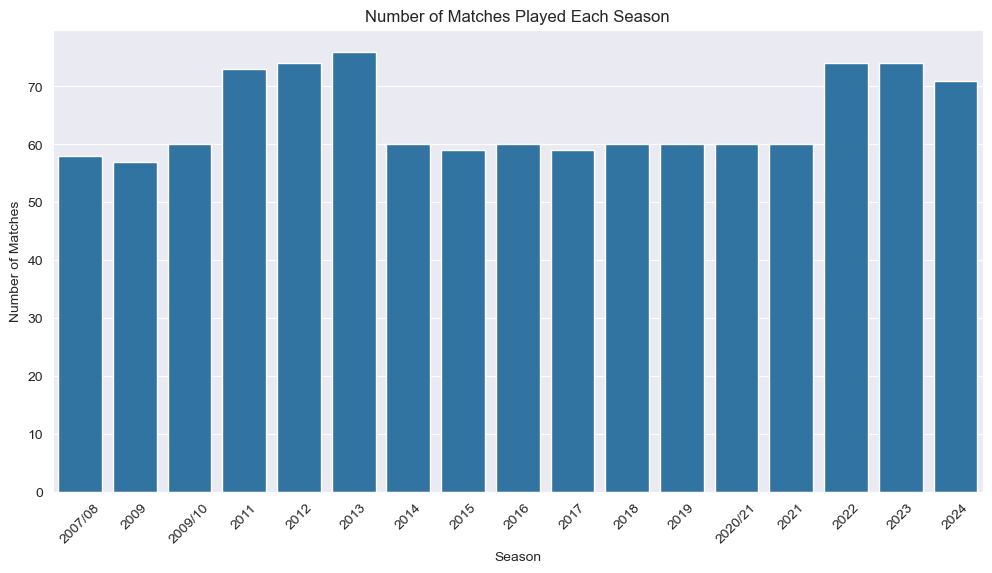

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x="season", 
    data=matches_df
)
plt.title("Number of Matches Played Each Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()


#### Matches Hosted per City


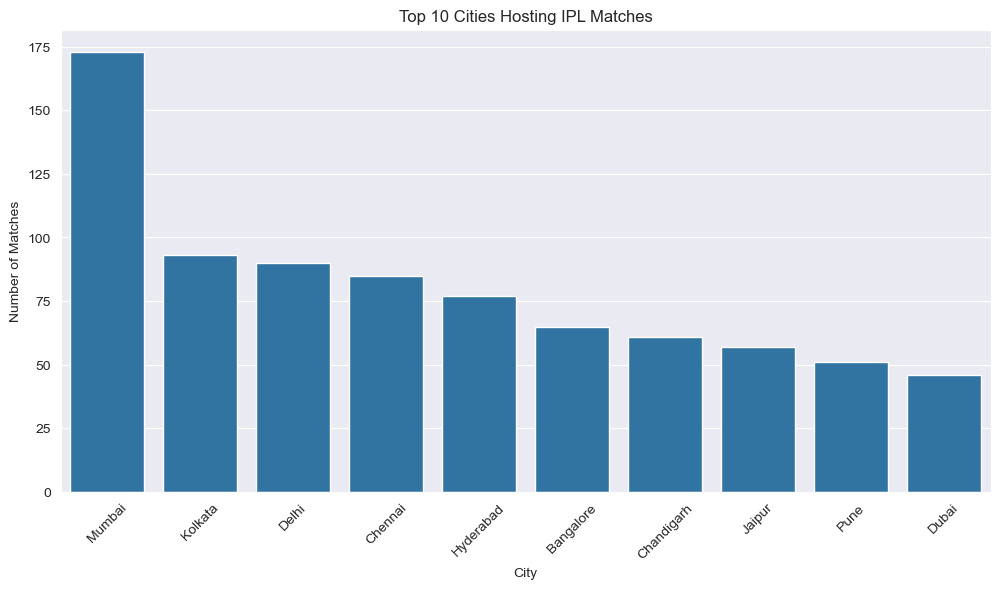

In [9]:
# Cities with more than 40 matches hosted

plt.figure(figsize=(12, 6))
top_cities = matches_df["city"].value_counts()
top_cities = top_cities[top_cities >= 40]
sns.barplot(
    x=top_cities.index, 
    y=top_cities.values
)
plt.title("Top 10 Cities Hosting IPL Matches")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()

#### Matches Hosted per Venue


C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\2006348126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


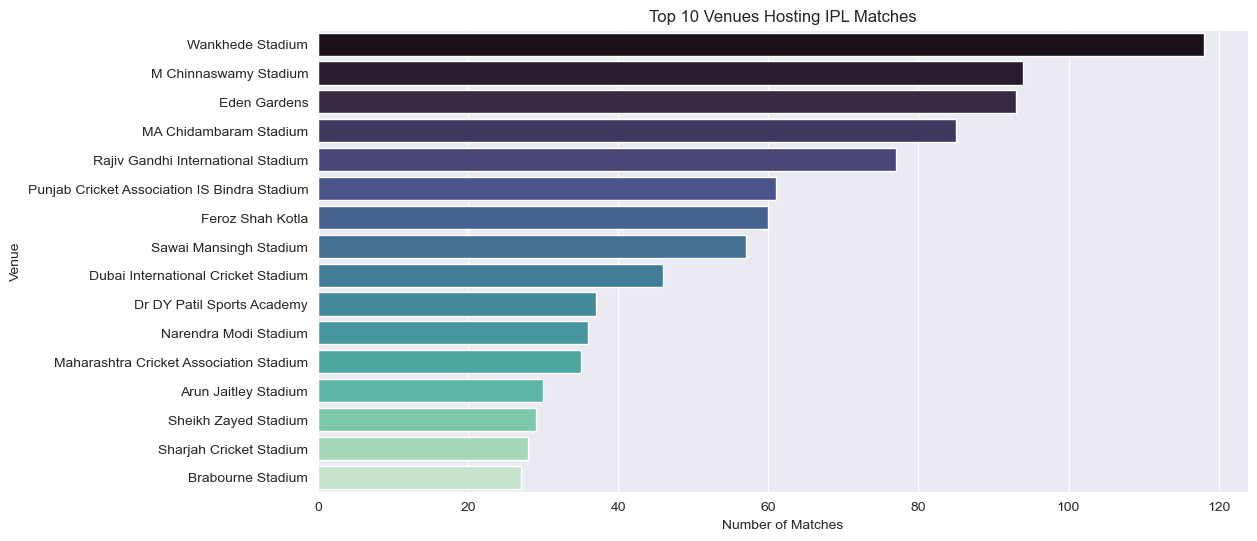

In [10]:
# Venues with more than 20 matches hosted

plt.figure(figsize=(12, 6))
top_venues = matches_df["venue"].value_counts()
top_venues = top_venues[top_venues >= 20]
sns.barplot(
    y=top_venues.index, 
    x=top_venues.values, 
    palette="mako", 
    orient="h")
plt.title("Top 10 Venues Hosting IPL Matches")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()

#### Teams Participation




Team Participation:
╒═════════════════════════════╤══════════════════╕
│ Team                        │   Matches Played │
╞═════════════════════════════╪══════════════════╡
│ Mumbai Indians              │              261 │
├─────────────────────────────┼──────────────────┤
│ Sunrisers Hyderabad         │              257 │
├─────────────────────────────┼──────────────────┤
│ Royal Challengers Bengaluru │              255 │
├─────────────────────────────┼──────────────────┤
│ Delhi Capitals              │              252 │
├─────────────────────────────┼──────────────────┤
│ Kolkata Knight Riders       │              251 │
├─────────────────────────────┼──────────────────┤
│ Punjab Kings                │              246 │
├─────────────────────────────┼──────────────────┤
│ Chennai Super Kings         │              238 │
├─────────────────────────────┼──────────────────┤
│ Rajasthan Royals            │              221 │
├─────────────────────────────┼──────────────────┤
│ Pune Wa

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\1424823572.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


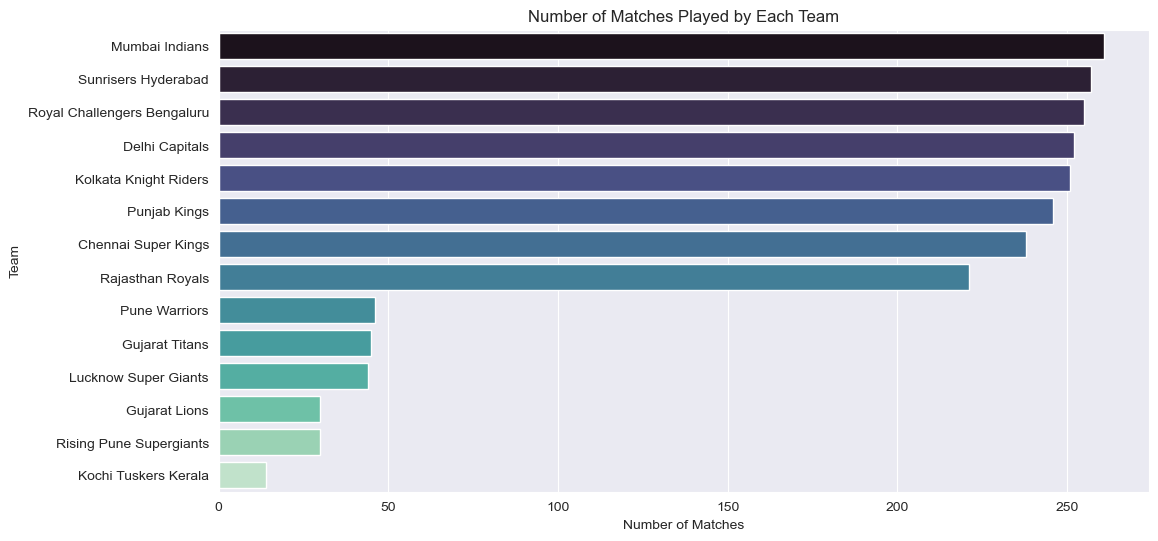

In [11]:
# Display the team participation data in a table format

# Convert the Series to a DataFrame for tabulate
team_participation = pd.concat(
    [matches_df["team1"], matches_df["team2"]]
).value_counts()
team_participation_df = team_participation.reset_index()
team_participation_df.columns = ["Team", "Matches Played"]
# Print the table
print("\n\nTeam Participation:")
print(
    tabulate(
        team_participation_df, headers="keys", tablefmt="fancy_grid", showindex=False
    )
)

# Plotting the number of matches played by each team
plt.figure(figsize=(12, 6))
sns.barplot(
    y=team_participation.index,
    x=team_participation.values,
    palette="mako",
    orient="h",
)
plt.title("Number of Matches Played by Each Team")
plt.xlabel("Number of Matches")
plt.ylabel("Team")
plt.show()

#### Match Winners




Match Winners:
╒═════════════════════════════╤═══════════════╕
│ Team                        │   Matches Won │
╞═════════════════════════════╪═══════════════╡
│ Mumbai Indians              │           144 │
├─────────────────────────────┼───────────────┤
│ Chennai Super Kings         │           138 │
├─────────────────────────────┼───────────────┤
│ Kolkata Knight Riders       │           131 │
├─────────────────────────────┼───────────────┤
│ Royal Challengers Bengaluru │           123 │
├─────────────────────────────┼───────────────┤
│ Sunrisers Hyderabad         │           117 │
├─────────────────────────────┼───────────────┤
│ Delhi Capitals              │           115 │
├─────────────────────────────┼───────────────┤
│ Rajasthan Royals            │           112 │
├─────────────────────────────┼───────────────┤
│ Punjab Kings                │           112 │
├─────────────────────────────┼───────────────┤
│ Gujarat Titans              │            28 │
├──────────────────────

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\1526220731.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


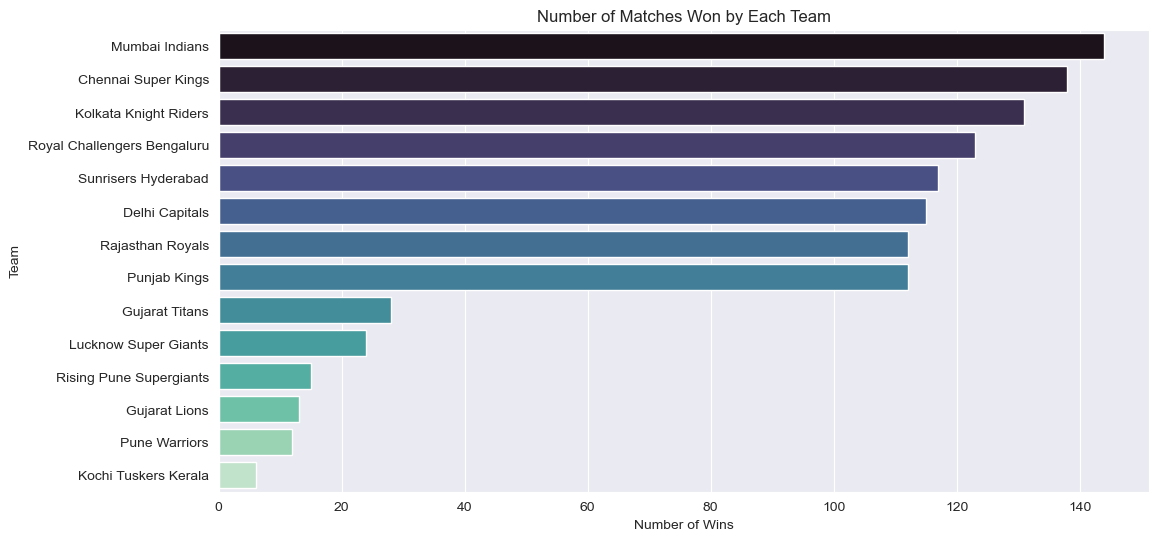

In [12]:
# Display the match winners data in a table format
# Convert the Series to a DataFrame for tabulate
match_winners = matches_df["winner"].value_counts()
match_winners_df = match_winners.reset_index()
match_winners_df.columns = ["Team", "Matches Won"]
# Print the table
print("\n\nMatch Winners:")
print(
    tabulate(match_winners_df, headers="keys", tablefmt="fancy_grid", showindex=False)
)

# Plotting the match winners
plt.figure(figsize=(12, 6))
sns.barplot(
    y=match_winners.index, 
    x=match_winners.values, 
    palette="mako", 
    orient="h"
)
plt.title("Number of Matches Won by Each Team")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.show()

#### Toss Decisions


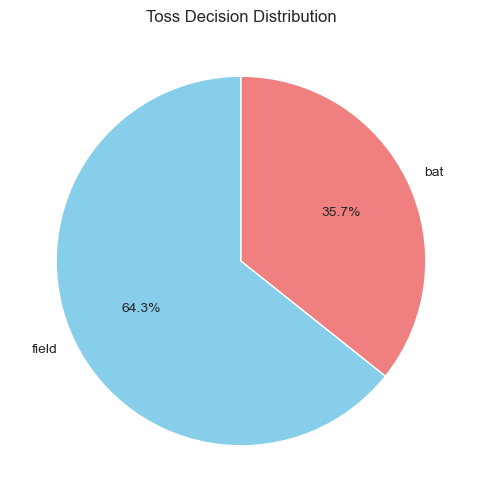

In [13]:
plt.figure(figsize=(6, 6))
toss_decision_counts = matches_df["toss_decision"].value_counts()
plt.pie(
    toss_decision_counts,
    labels=toss_decision_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "lightcoral"],
)
plt.title("Toss Decision Distribution")
plt.ylabel("")  # Hide the y-label which defaults to 'toss_decision'
plt.show()

#### Toss Decision vs Match Outcome


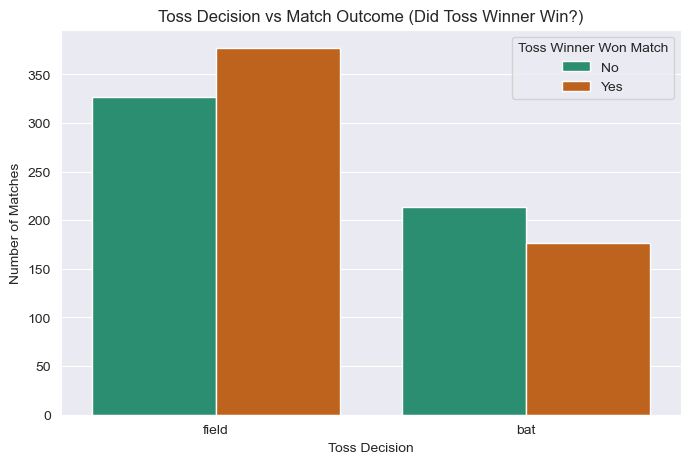

In [14]:
matches_df["toss_win_match_win"] = np.where(
    (matches_df["toss_winner"] == matches_df["winner"]), "Yes", "No"
)

plt.figure(figsize=(8, 5))

sns.countplot(
    x="toss_decision", 
    hue="toss_win_match_win", 
    data=matches_df, palette="Dark2"
)

plt.title("Toss Decision vs Match Outcome (Did Toss Winner Win?)")
plt.xlabel("Toss Decision")
plt.ylabel("Number of Matches")
plt.legend(title="Toss Winner Won Match")
plt.show()


#### Player of the Match Awards (Top 15)


In [15]:
# Calculate top 15 Player of the Match awards
pom_awards = matches_df["player_of_match"].value_counts().nlargest(10)

# Convert the Series to a DataFrame for tabulate
pom_awards_df = pom_awards.reset_index()
pom_awards_df.columns = ["Player", "Number of Awards"]

# Print the table
print("\n\nTop 15 Players by Player of the Match Awards:")
print(tabulate(pom_awards_df, headers="keys", tablefmt="fancy_grid", showindex=False))



Top 15 Players by Player of the Match Awards:
╒════════════════╤════════════════════╕
│ Player         │   Number of Awards │
╞════════════════╪════════════════════╡
│ AB de Villiers │                 25 │
├────────────────┼────────────────────┤
│ CH Gayle       │                 22 │
├────────────────┼────────────────────┤
│ RG Sharma      │                 19 │
├────────────────┼────────────────────┤
│ DA Warner      │                 18 │
├────────────────┼────────────────────┤
│ V Kohli        │                 18 │
├────────────────┼────────────────────┤
│ MS Dhoni       │                 17 │
├────────────────┼────────────────────┤
│ SR Watson      │                 16 │
├────────────────┼────────────────────┤
│ YK Pathan      │                 16 │
├────────────────┼────────────────────┤
│ RA Jadeja      │                 16 │
├────────────────┼────────────────────┤
│ AD Russell     │                 15 │
╘════════════════╧════════════════════╛


#### Result Types (win by wickets/runs)




Match Result Types:
╒═══════════════╤═════════╕
│ Result Type   │   Count │
╞═══════════════╪═════════╡
│ wickets       │     578 │
├───────────────┼─────────┤
│ runs          │     498 │
├───────────────┼─────────┤
│ tie           │      14 │
├───────────────┼─────────┤
│ no result     │       5 │
╘═══════════════╧═════════╛


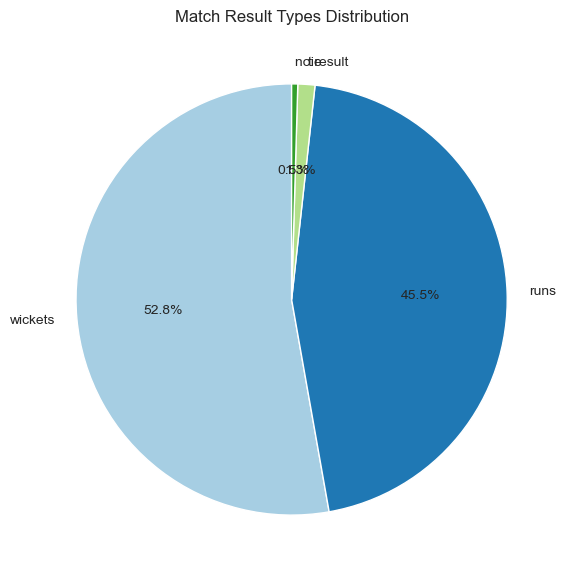

In [16]:
# Display the result counts in a table format
result_counts = matches_df["result"].value_counts()
result_counts_df = result_counts.reset_index()
result_counts_df.columns = ["Result Type", "Count"]
print("\n\nMatch Result Types:")
print(
    tabulate(result_counts_df, headers="keys", tablefmt="fancy_grid", showindex=False)
)

# Plot the result types distribution
plt.figure(figsize=(7, 7))
plt.pie(
    result_counts,
    labels=result_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Paired"),
)
plt.title("Match Result Types Distribution")
plt.ylabel("")
plt.show()

#### Run Distribution (0s, 1s, 2s, 3s, 4s, 5s, 6s)




Distribution of Runs Scored per Ball (Batsman):
╒═══════════════╤═════════════╕
│   Runs Scored │   Frequency │
╞═══════════════╪═════════════╡
│             0 │      103940 │
├───────────────┼─────────────┤
│             1 │       96778 │
├───────────────┼─────────────┤
│             2 │       16453 │
├───────────────┼─────────────┤
│             3 │         783 │
├───────────────┼─────────────┤
│             4 │       29850 │
├───────────────┼─────────────┤
│             5 │          65 │
├───────────────┼─────────────┤
│             6 │       13051 │
╘═══════════════╧═════════════╛


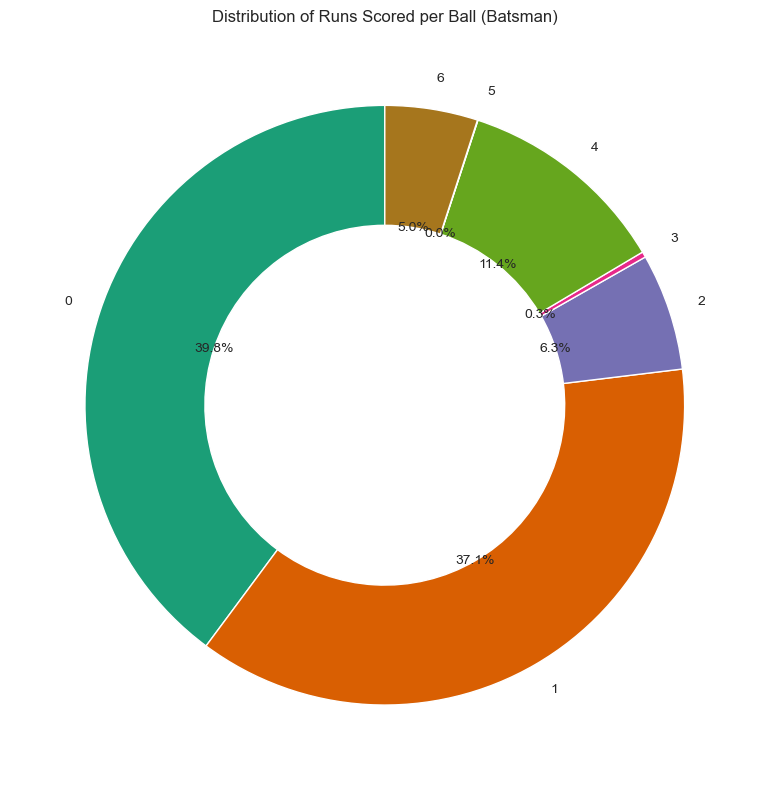

In [17]:
# Calculate run counts
run_counts = deliveries_df["batsman_runs"].value_counts().sort_index()

# Convert to DataFrame for tabulate
run_counts_df = run_counts.reset_index()
run_counts_df.columns = ["Runs Scored", "Frequency"]

# Print the table
print("\n\nDistribution of Runs Scored per Ball (Batsman):")
print(tabulate(run_counts_df, headers="keys", tablefmt="fancy_grid", showindex=False))

# Plot the distribution of runs scored per ball
plt.figure(figsize=(8, 8))
# Create the donut chart using plt.pie with wedgeprops
plt.pie(
    run_counts.values,
    labels=run_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=sns.color_palette("Dark2"),  # 👈 Updated to a colorful, distinct palette
)
plt.title("Distribution of Runs Scored per Ball (Batsman)")
plt.ylabel("")  # Hide the default y-label for pie charts
plt.tight_layout()
plt.show()

#### Extra Types (wides, legbyes, no-balls, ...)




Frequency of Different Extra Types:
╒══════════════╤═════════════╕
│ Extra Type   │   Frequency │
╞══════════════╪═════════════╡
│ wides        │        8380 │
├──────────────┼─────────────┤
│ legbyes      │        4001 │
├──────────────┼─────────────┤
│ noballs      │        1069 │
├──────────────┼─────────────┤
│ byes         │         673 │
├──────────────┼─────────────┤
│ penalty      │           2 │
╘══════════════╧═════════════╛


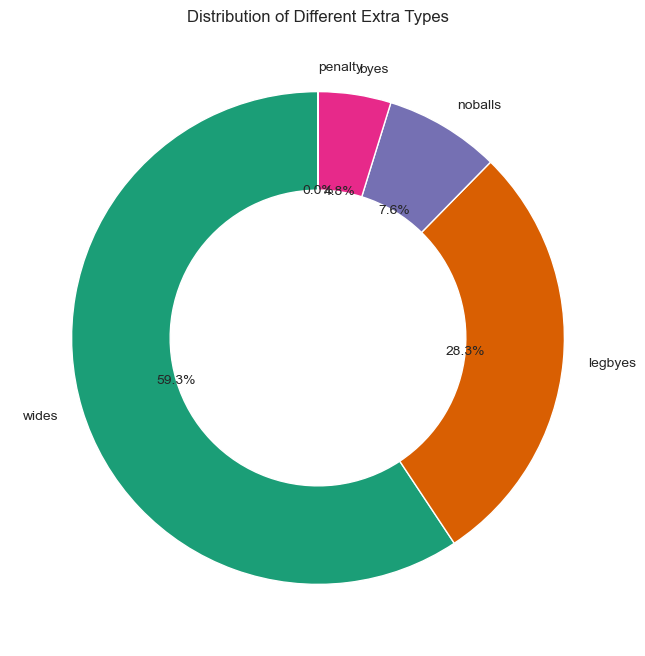

In [18]:
# Filter out 'None' before plotting
extras_counts = deliveries_df[deliveries_df["extras_type"] != "None"][
    "extras_type"
].value_counts()

# Convert to DataFrame for tabulate
extras_counts_df = extras_counts.reset_index()
extras_counts_df.columns = ["Extra Type", "Frequency"]

# Print the table
print("\n\nFrequency of Different Extra Types:")
print(
    tabulate(extras_counts_df, headers="keys", tablefmt="fancy_grid", showindex=False)
)

# Plot the distribution of extra types as a donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    extras_counts.values,
    labels=extras_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=sns.color_palette("Dark2"),
)
plt.title("Distribution of Different Extra Types")
plt.ylabel("")
plt.show()

#### Dismissal Kinds (caught, bowled, run-out, lbw,...)




Frequency of Different Dismissal Kinds:
╒═══════════════════════╤═════════════╕
│ Dismissal Kind        │   Frequency │
╞═══════════════════════╪═════════════╡
│ caught                │        8063 │
├───────────────────────┼─────────────┤
│ bowled                │        2212 │
├───────────────────────┼─────────────┤
│ run out               │        1114 │
├───────────────────────┼─────────────┤
│ lbw                   │         800 │
├───────────────────────┼─────────────┤
│ caught and bowled     │         367 │
├───────────────────────┼─────────────┤
│ stumped               │         358 │
├───────────────────────┼─────────────┤
│ retired hurt          │          15 │
├───────────────────────┼─────────────┤
│ hit wicket            │          15 │
├───────────────────────┼─────────────┤
│ obstructing the field │           3 │
├───────────────────────┼─────────────┤
│ retired out           │           3 │
╘═══════════════════════╧═════════════╛


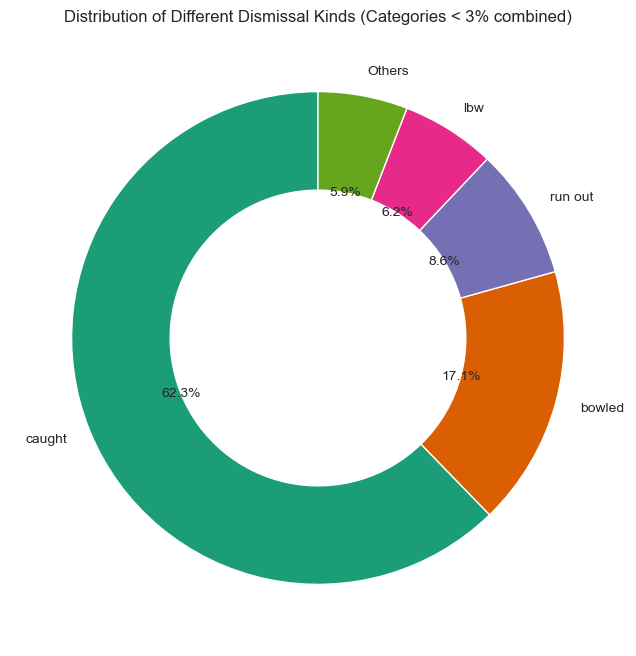

In [19]:
# 12. Dismissal Kinds


# Filter out 'NA' before plotting



dismissal_counts = deliveries_df[deliveries_df["dismissal_kind"] != "NA"][
    "dismissal_kind"
].value_counts()


# Convert to DataFrame for tabulate
dismissal_counts_df = dismissal_counts.reset_index()
dismissal_counts_df.columns = ["Dismissal Kind", "Frequency"]

# Print the table
print("\n\nFrequency of Different Dismissal Kinds:")
print(
    tabulate(
        dismissal_counts_df, headers="keys", tablefmt="fancy_grid", showindex=False
    )
)

# Plot the distribution of dismissal kinds as a donut chart
# Calculate percentages
total_dismissals = dismissal_counts.sum()
percentages = (dismissal_counts / total_dismissals) * 100

# Identify categories with less than 3%
small_categories = percentages[percentages < 3].index
others_count = dismissal_counts[small_categories].sum()

# Create new counts for plotting
plot_counts = dismissal_counts[percentages >= 3]
if others_count > 0:
    plot_counts["Others"] = others_count

# Plot the distribution of dismissal kinds as a donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    plot_counts.values,
    labels=plot_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=sns.color_palette("Dark2"),
)
plt.title("Distribution of Different Dismissal Kinds (Categories < 3% combined)")
plt.ylabel("")
plt.show()

## 2. Analysing Trends

This section delves deeper into analysing patterns and trends related to teams, players, venues, and seasonal changes.


### 2.1 Team Performance Analysis

- **Win Percentage**: Calculate and visualise the win percentage for each team.
- **Head-to-Head Analysis**: Create a matrix or visualisation showing the results of matches between specific pairs of teams.
- **Performance at Home vs Away**: Analyse if teams perform better in their home cities (requires defining 'home' cities).
- **Performance Batting First vs Second**: Analyse team success rates based on batting order.


#### Win Percentage

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\2848109658.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


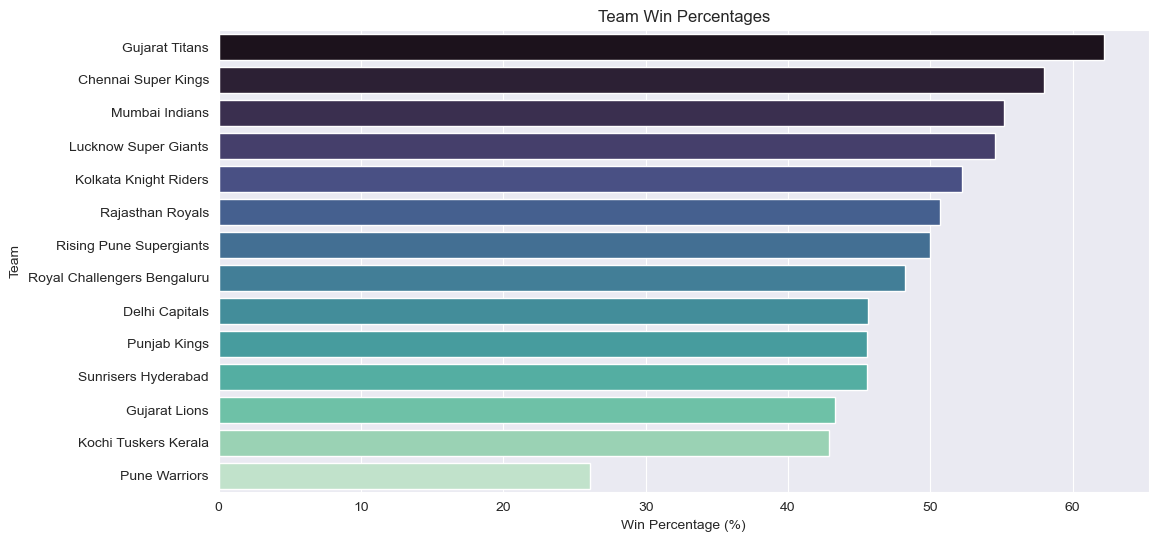

In [20]:
matches_played = team_participation  # From section 1.3
matches_won = matches_df["winner"].value_counts()

# Align indices before division
matches_won = matches_won.reindex(matches_played.index, fill_value=0)

win_percentage = (matches_won / matches_played) * 100
win_percentage_df = pd.DataFrame(
    {"Team": win_percentage.index, "Win Percentage": win_percentage.values}
).sort_values(by="Win Percentage", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    y="Team", x="Win Percentage", data=win_percentage_df, palette="mako", orient="h"
)
plt.title("Team Win Percentages")
plt.xlabel("Win Percentage (%)")
plt.ylabel("Team")
plt.show()

#### Head-to-Head Analysis

--- Mumbai Indians vs Chennai Super Kings Head-to-Head ---
winner
Mumbai Indians         20
Chennai Super Kings    17
Name: count, dtype: int64
Total Matches: 37
Mumbai Indians Wins: 20
Chennai Super Kings Wins: 17
No Result/Ties (not resolved): 0


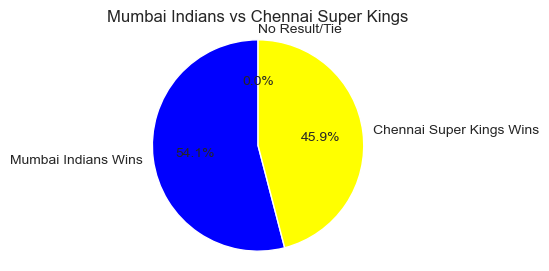



--- Kolkata Knight Riders vs Sunrisers Hyderabad Head-to-Head ---
winner
Kolkata Knight Riders    26
Sunrisers Hyderabad      11
Name: count, dtype: int64
Total Matches: 37
Kolkata Knight Riders Wins: 26
Sunrisers Hyderabad Wins: 11
No Result/Ties (not resolved): 0


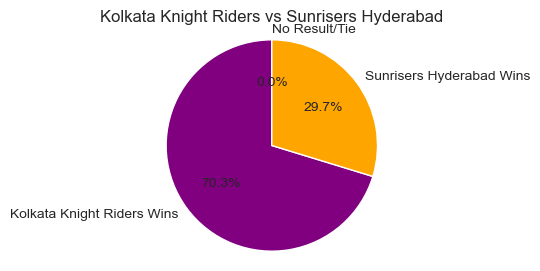



--- Delhi Capitals vs Punjab Kings Head-to-Head ---
winner
Punjab Kings      17
Delhi Capitals    16
Name: count, dtype: int64
Total Matches: 33
Delhi Capitals Wins: 16
Punjab Kings Wins: 17
No Result/Ties (not resolved): 0


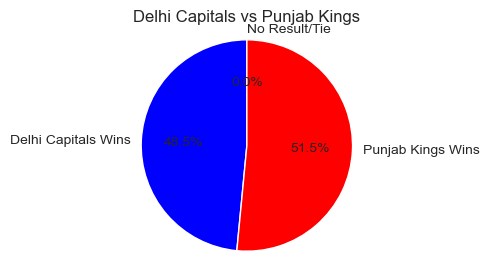



--- Rajasthan Royals vs Royal Challengers Bengaluru Head-to-Head ---
winner
Royal Challengers Bengaluru    15
Rajasthan Royals               14
Name: count, dtype: int64
Total Matches: 31
Rajasthan Royals Wins: 14
Royal Challengers Bengaluru Wins: 15
No Result/Ties (not resolved): 2


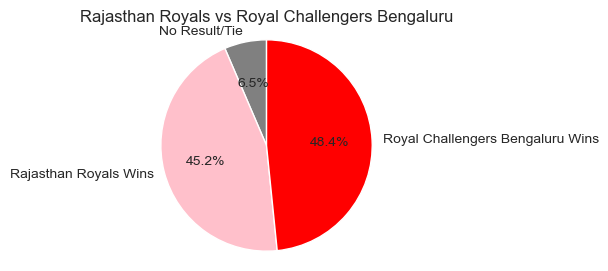

In [21]:
import matplotlib.pyplot as plt

# Common IPL team colors
team_colors = {
    "Mumbai Indians": "blue", 
    "Chennai Super Kings": "yellow", 
    "Kolkata Knight Riders": "purple", 
    "Sunrisers Hyderabad": "orange", 
    "Delhi Capitals": "blue", 
    "Punjab Kings": "red", 
    "Rajasthan Royals": "pink", 
    "Royal Challengers Bengaluru": "red", 
    "Lucknow Super Giants": "lightblue",
    "Gujarat Titans": "navy"
}

def get_head_to_head(team1, team2):
    # Filter matches between team1 and team2
    team_matches = matches_df[(
        (matches_df["team1"] == team1) & (matches_df["team2"] == team2)) |
        ((matches_df["team1"] == team2) & (matches_df["team2"] == team1))
    ]
    
    # Get wins by team
    wins = team_matches["winner"].value_counts()
    
    # Print head-to-head summary
    print(f"--- {team1} vs {team2} Head-to-Head ---")
    print(wins)
    print(f"Total Matches: {len(team_matches)}")
    
    # Add handling for teams not in wins index (e.g., if one team never won)
    team1_wins = wins.get(team1, 0)
    team2_wins = wins.get(team2, 0)
    no_result = len(team_matches) - (team1_wins + team2_wins)
    
    print(f"{team1} Wins: {team1_wins}")
    print(f"{team2} Wins: {team2_wins}")
    print(f"No Result/Ties (not resolved): {no_result}")
    
    # Colors for the teams
    team1_color = team_colors.get(team1, 'gray')  # Default to gray if not found
    team2_color = team_colors.get(team2, 'gray')  # Default to gray if not found
    
    # Plotting
    result_labels = ['No Result/Tie', f'{team1} Wins', f'{team2} Wins']
    result_sizes = [no_result, team1_wins, team2_wins]
    result_colors = ['gray', team1_color, team2_color]  # Colors for each part of the pie
    
    plt.figure(figsize=(3, 3))
    plt.pie(result_sizes, labels=result_labels, autopct='%1.1f%%', colors=result_colors, startangle=90)
    plt.title(f"{team1} vs {team2}")
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()


# Example Usage:
get_head_to_head("Mumbai Indians", "Chennai Super Kings")
print("\n")
get_head_to_head("Kolkata Knight Riders", "Sunrisers Hyderabad")
print("\n")
get_head_to_head("Delhi Capitals", "Punjab Kings")
print("\n")
get_head_to_head("Rajasthan Royals", "Royal Challengers Bengaluru")


#### Performance Batting First vs Second


--- Top 8 Teams Wins: Batting First vs Second ---
╒═════════════════════════════╤══════════════════╤═══════════════════╤══════════════╕
│                             │   Bat First Wins │   Bat Second Wins │   Total Wins │
╞═════════════════════════════╪══════════════════╪═══════════════════╪══════════════╡
│ Mumbai Indians              │               71 │                71 │          142 │
├─────────────────────────────┼──────────────────┼───────────────────┼──────────────┤
│ Chennai Super Kings         │               71 │                67 │          138 │
├─────────────────────────────┼──────────────────┼───────────────────┼──────────────┤
│ Kolkata Knight Riders       │               54 │                76 │          130 │
├─────────────────────────────┼──────────────────┼───────────────────┼──────────────┤
│ Royal Challengers Bengaluru │               57 │                64 │          121 │
├─────────────────────────────┼──────────────────┼───────────────────┼──────────────┤
│ S

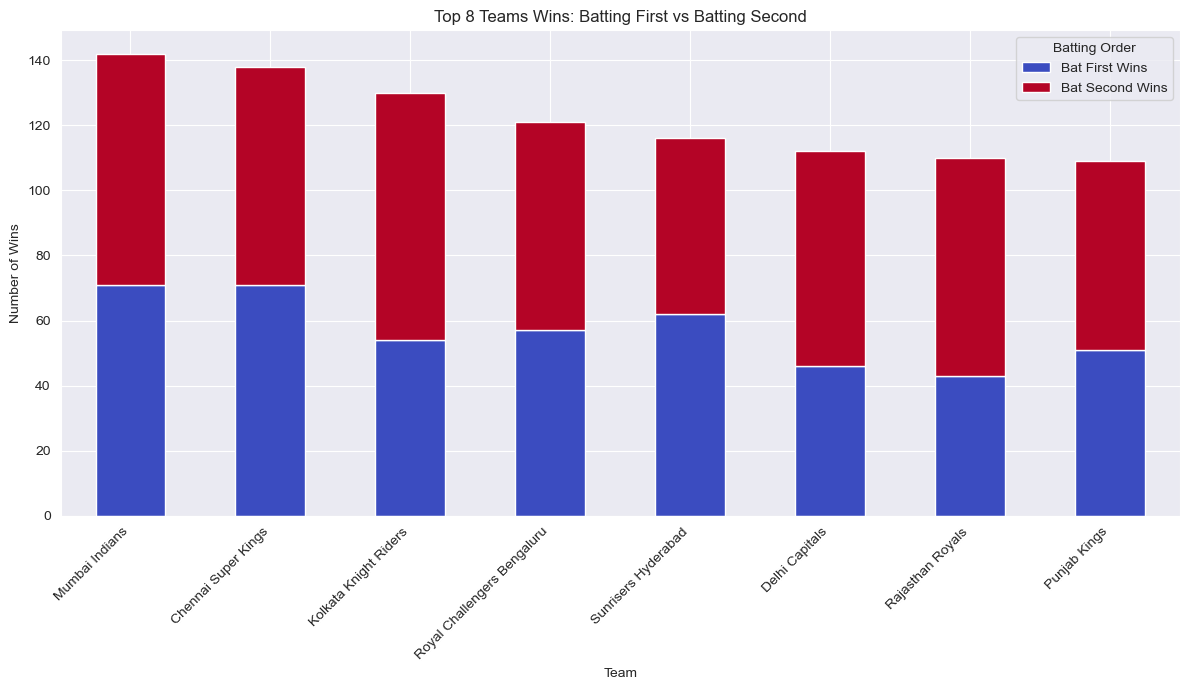

In [22]:
bat_first_wins = matches_df[matches_df["result"] == "runs"]["winner"].value_counts()
bat_second_wins = matches_df[matches_df["result"] == "wickets"]["winner"].value_counts()

# Combine and fill NaNs
team_batting_pref = pd.DataFrame(
    {"Bat First Wins": bat_first_wins, "Bat Second Wins": bat_second_wins}
).fillna(0)
team_batting_pref["Total Wins"] = (
    team_batting_pref["Bat First Wins"] + team_batting_pref["Bat Second Wins"]
)

# Get top 8 teams by matches played
top_8_teams = team_participation.nlargest(8).index

# Filter the batting preference data for top 8 teams
team_batting_pref_top8 = team_batting_pref.loc[top_8_teams].sort_values(
    "Total Wins", ascending=False
)


print("\n--- Top 8 Teams Wins: Batting First vs Second ---")
print(
    tabulate(
        team_batting_pref_top8.astype(int), headers="keys", tablefmt="fancy_grid"
    )
)


team_batting_pref_top8[["Bat First Wins", "Bat Second Wins"]].plot(
    kind="bar", stacked=True, figsize=(12, 7), colormap="coolwarm"
)
plt.title("Top 8 Teams Wins: Batting First vs Batting Second")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Batting Order")
plt.tight_layout()
plt.show()


### 2.2 Player Performance Analysis

- **Top Run Scorers**: Identify and visualise the leading run-scorers across all seasons or per season.
- **Top Wicket Takers**: Identify and visualise the leading wicket-takers across all seasons or per season.
- **Best Strike Rates (Batsmen)**: Analyse batsmen with the highest strike rates (min. balls faced criteria).
- **Best Economy Rates (Bowlers)**: Analyse bowlers with the best economy rates (min. overs bowled criteria).
- **Most Sixes/Fours**: Identify players hitting the most boundaries.
- **Performance in Crucial Overs**: Analyse player performance (batting strike rate, bowling economy) in powerplays and death overs.


In [23]:
# Merge dataframes for player analysis
# Ensure 'id' in matches_df and 'match_id' in deliveries_df are compatible
if "id" in matches_df.columns and "match_id" in deliveries_df.columns:
    matches_renamed_df = matches_df.rename(columns={"id": "match_id"})
    merged_df = pd.merge(deliveries_df, matches_renamed_df, on="match_id", how="left")
    print("DataFrames merged successfully.")
else:
    print(
        "Error: 'id' column not found in matches_df or 'match_id' not found in deliveries_df."
    )
    merged_df = pd.DataFrame()


DataFrames merged successfully.


#### Batsmen


##### Top Run Scorers


C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\1694492339.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_scorers.index, x=top_scorers.values, palette="Blues_r", orient="h")


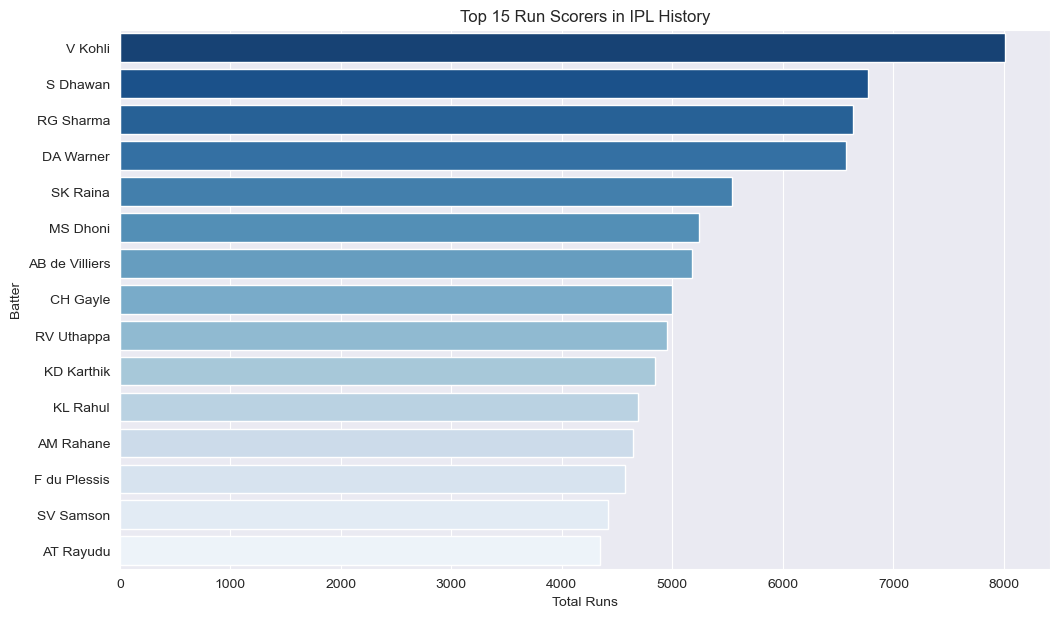

In [24]:
# Top Run Scorers


top_scorers = (
    deliveries_df.groupby("batter")["batsman_runs"]
    .sum()
    .sort_values(ascending=False)
    .nlargest(15)
)


plt.figure(figsize=(12, 7))


sns.barplot(y=top_scorers.index, x=top_scorers.values, palette="Blues_r", orient="h")

plt.title("Top 15 Run Scorers in IPL History")


plt.xlabel("Total Runs")


plt.ylabel("Batter")


plt.show()

##### Best Strike Rates




Top 15 Batsmen by Strike Rate (Min. 500 Balls Faced):
╒═════════════════╤════════╤═══════════════╤═══════════════╕
│ batter          │   Runs │   Balls Faced │   Strike Rate │
╞═════════════════╪════════╪═══════════════╪═══════════════╡
│ AD Russell      │   2488 │          1423 │        174.84 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ H Klaasen       │    993 │           590 │        168.31 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ SP Narine       │   1534 │           925 │        165.84 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ LS Livingstone  │    939 │           578 │        162.46 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ N Pooran        │   1769 │          1092 │        162    │
├─────────────────┼────────┼───────────────┼───────────────┤
│ RM Patidar      │    799 │           503 │        158.85 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ GJ Maxwell      │   2772 │ 

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\781618857.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


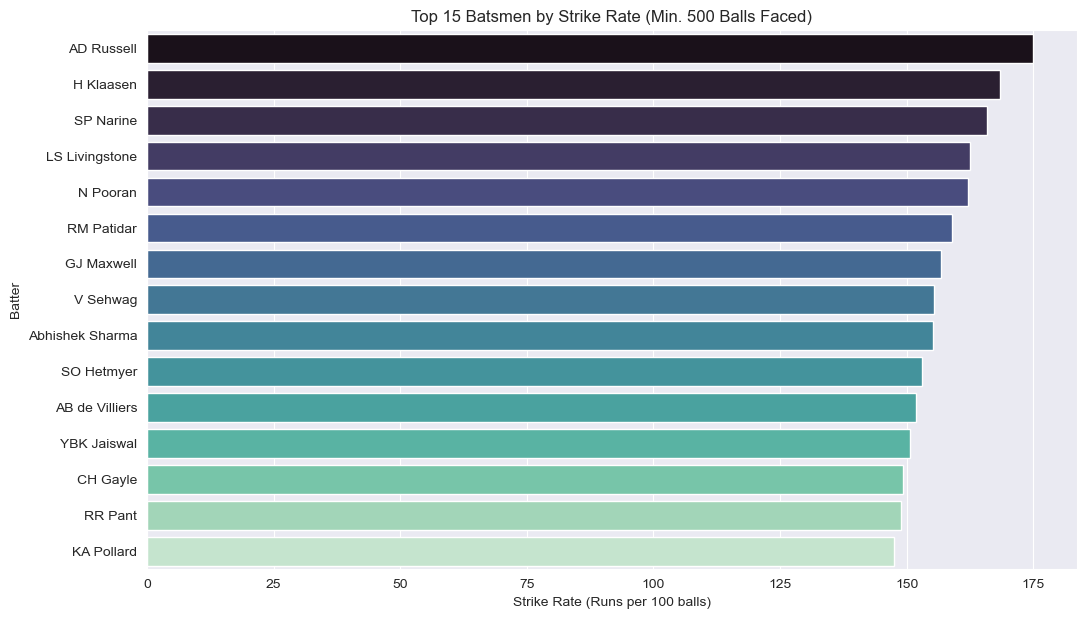

In [25]:
# Best Strike Rates (min. 500 balls faced)

# Calculate runs scored and balls faced per batsman
balls_faced = deliveries_df[deliveries_df['extras_type'] != 'wides'].groupby('batter')['ball'].count()
runs_scored = deliveries_df.groupby('batter')['batsman_runs'].sum()

batsman_stats = pd.DataFrame({'Runs': runs_scored, 'Balls Faced': balls_faced})

min_balls_threshold = 500
batsman_stats = batsman_stats[batsman_stats['Balls Faced'] >= min_balls_threshold]

batsman_stats['Strike Rate'] = (batsman_stats['Runs'] / batsman_stats['Balls Faced']) * 100

top_strike_rates = batsman_stats.sort_values('Strike Rate', ascending=False).nlargest(15, 'Strike Rate')

# Print the table
print(f"\n\nTop 15 Batsmen by Strike Rate (Min. {min_balls_threshold} Balls Faced):")
top_strike_rates_table = top_strike_rates.copy()
top_strike_rates_table['Strike Rate'] = top_strike_rates_table['Strike Rate'].map('{:.2f}'.format)
print(tabulate(top_strike_rates_table, headers='keys', tablefmt='fancy_grid'))

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(
    y=top_strike_rates.index, 
    x=top_strike_rates['Strike Rate'], 
    palette='mako', 
    orient='h'
)
plt.title(f'Top 15 Batsmen by Strike Rate (Min. {min_balls_threshold} Balls Faced)')
plt.xlabel('Strike Rate (Runs per 100 balls)')
plt.ylabel('Batter')
plt.show()


##### Most Boundries (Sixes/Fours)




Top 15 Batsmen by Total Boundaries (Fours + Sixes):
╒════════════════╤══════════════════════════════╕
│ Batter         │   Total Boundaries (4s + 6s) │
╞════════════════╪══════════════════════════════╡
│ V Kohli        │                          981 │
├────────────────┼──────────────────────────────┤
│ S Dhawan       │                          921 │
├────────────────┼──────────────────────────────┤
│ DA Warner      │                          899 │
├────────────────┼──────────────────────────────┤
│ RG Sharma      │                          880 │
├────────────────┼──────────────────────────────┤
│ CH Gayle       │                          767 │
├────────────────┼──────────────────────────────┤
│ SK Raina       │                          710 │
├────────────────┼──────────────────────────────┤
│ AB de Villiers │                          667 │
├────────────────┼──────────────────────────────┤
│ RV Uthappa     │                          663 │
├────────────────┼────────────────────────────

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\827579408.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


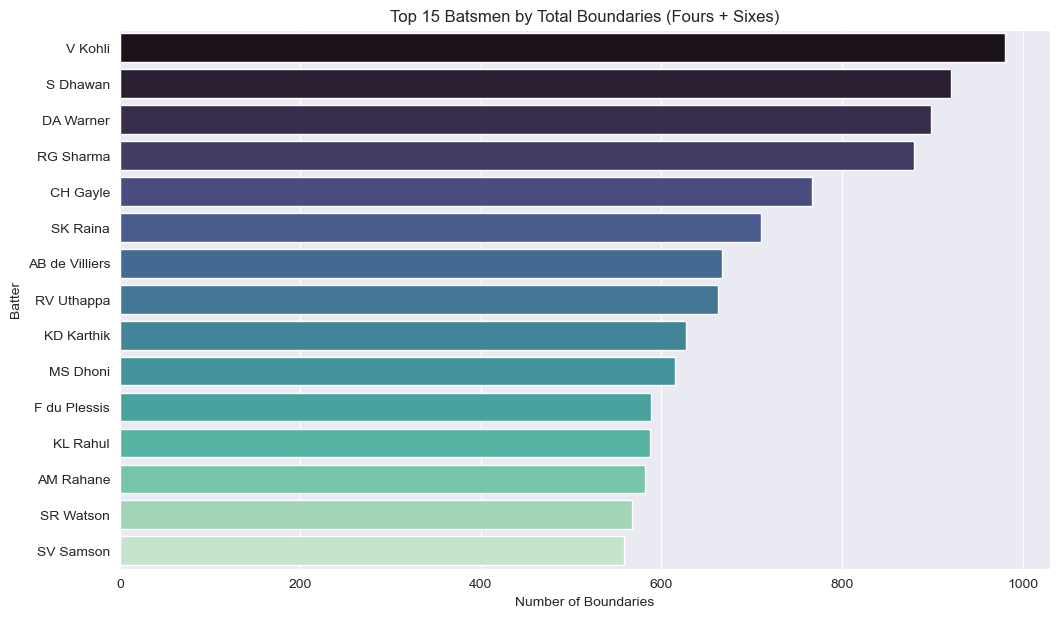

In [26]:
# Most Boundaries (Fours + Sixes)

# Filter for boundaries (4s and 6s)
boundaries_df = deliveries_df[deliveries_df["batsman_runs"].isin([4, 6])]

# Count boundaries per batsman
most_boundaries = (
    boundaries_df.groupby("batter")["batsman_runs"]
    .count()
    .sort_values(ascending=False)
    .nlargest(15)
)

# Convert to DataFrame for tabulate
most_boundaries_df = most_boundaries.reset_index()
most_boundaries_df.columns = ["Batter", "Total Boundaries (4s + 6s)"]

# Print the table
print("\n\nTop 15 Batsmen by Total Boundaries (Fours + Sixes):")
print(
    tabulate(most_boundaries_df, headers="keys", tablefmt="fancy_grid", showindex=False)
)

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(
    y=most_boundaries.index, x=most_boundaries.values, palette="mako", orient="h"
)
plt.title("Top 15 Batsmen by Total Boundaries (Fours + Sixes)")
plt.xlabel("Number of Boundaries")
plt.ylabel("Batter")
plt.show()

##### Performance in Powerplay Overs (1-6)




Top 15 Batsmen by Powerplay Strike Rate (Min. 200 Balls Faced):
╒═════════════════╤════════╤═══════════════╤═══════════════╕
│ batter          │   Runs │   Balls Faced │   Strike Rate │
╞═════════════════╪════════╪═══════════════╪═══════════════╡
│ TM Head         │    412 │           210 │        196.19 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ PD Salt         │    404 │           231 │        174.89 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ SP Narine       │    946 │           552 │        171.38 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ Abhishek Sharma │    758 │           482 │        157.26 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ YBK Jaiswal     │   1009 │           661 │        152.65 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ YK Pathan       │    361 │           245 │        147.35 │
├─────────────────┼────────┼───────────────┼───────────────┤
│ JM Bairstow     │

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\2176824506.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


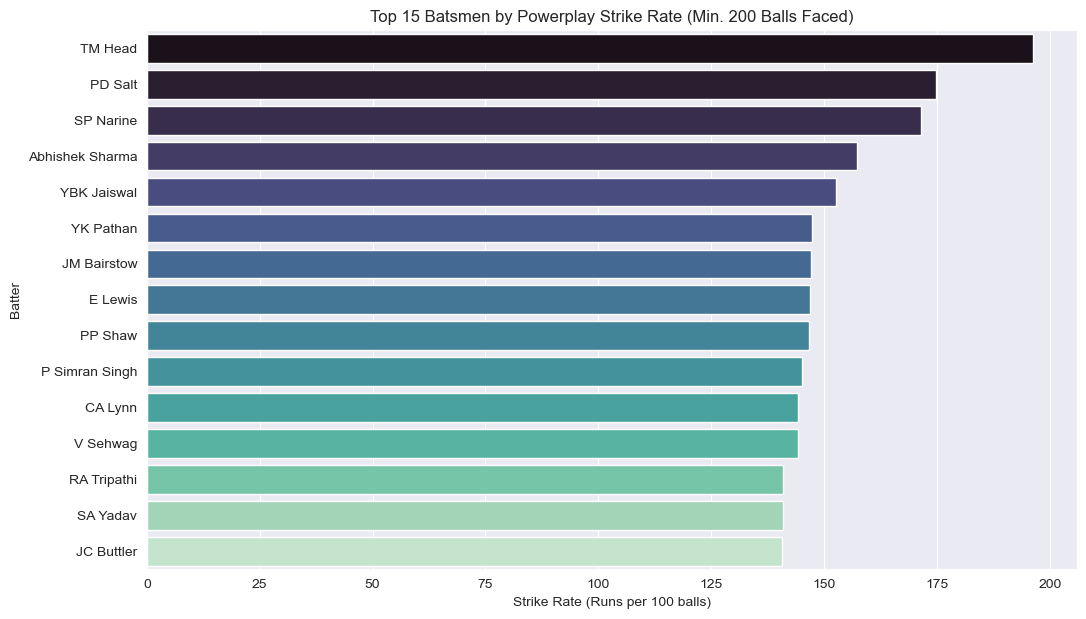

In [27]:
# Performance in Powerplay Overs (1-6)

# Filter deliveries for powerplay overs (over 0 to 5)
powerplay_df = deliveries_df[deliveries_df["over"] < 6]

# Calculate runs scored and balls faced per batsman in powerplay
# Exclude wides from ball count
pp_balls_faced = (
    powerplay_df[powerplay_df["extras_type"] != "wides"]
    .groupby("batter")["ball"]
    .count()
)
pp_runs_scored = powerplay_df.groupby("batter")["batsman_runs"].sum()

# Combine into a DataFrame
powerplay_stats = pd.DataFrame({"Runs": pp_runs_scored, "Balls Faced": pp_balls_faced})

# Filter out batsmen with less than a minimum number of balls faced in powerplay (e.g., 200)
min_pp_balls_threshold = 200
powerplay_stats = powerplay_stats[
    powerplay_stats["Balls Faced"] >= min_pp_balls_threshold
]

# Calculate Powerplay Strike Rate
powerplay_stats["Strike Rate"] = (
    powerplay_stats["Runs"] / powerplay_stats["Balls Faced"]
) * 100

# Get top 15 batsmen by powerplay strike rate
top_pp_strike_rates = powerplay_stats.sort_values(
    "Strike Rate", ascending=False
).nlargest(15, "Strike Rate")

# Print the table
print(
    f"\n\nTop 15 Batsmen by Powerplay Strike Rate (Min. {min_pp_balls_threshold} Balls Faced):"
)
# Format strike rate for printing
top_pp_strike_rates_table = top_pp_strike_rates.copy()
top_pp_strike_rates_table["Strike Rate"] = top_pp_strike_rates_table["Strike Rate"].map(
    "{:.2f}".format
)
print(tabulate(top_pp_strike_rates_table, headers="keys", tablefmt="fancy_grid"))

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(
    y=top_pp_strike_rates.index,
    x=top_pp_strike_rates["Strike Rate"],
    palette="mako",
    orient="h",
)
plt.title(
    f"Top 15 Batsmen by Powerplay Strike Rate (Min. {min_pp_balls_threshold} Balls Faced)"
)
plt.xlabel("Strike Rate (Runs per 100 balls)")
plt.ylabel("Batter")
plt.show()


#### Bowlers


##### Top Wicket Takers


C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\2357899429.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_bowlers.index, x=top_bowlers.values, palette="mako", orient="h")


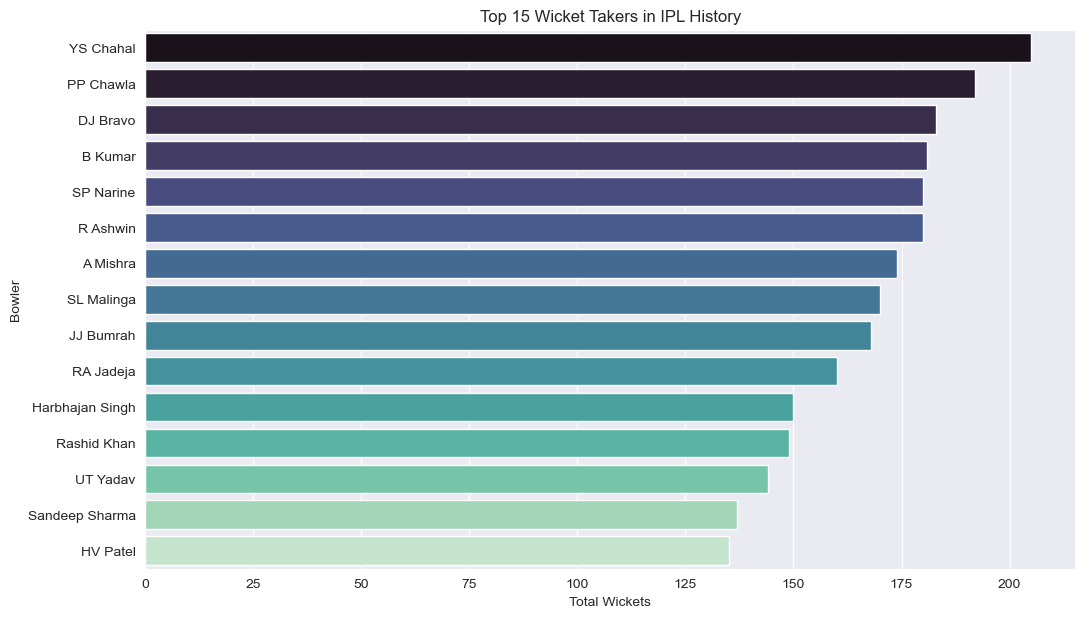

In [28]:

# Filter for actual wickets (excluding run outs, retired hurt etc.)
wickets_df = deliveries_df[
    deliveries_df["dismissal_kind"].notna()
    & ~deliveries_df["dismissal_kind"].isin(
        ["run out", "retired hurt", "obstructing the field", "retired out"]
    )
]
top_bowlers = (
    wickets_df.groupby("bowler")["is_wicket"]
    .sum()
    .sort_values(ascending=False)
    .nlargest(15)
)
plt.figure(figsize=(12, 7))
sns.barplot(y=top_bowlers.index, x=top_bowlers.values, palette="mako", orient="h")
plt.title("Top 15 Wicket Takers in IPL History")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.show()


##### Best Economy Rates




Top 15 Bowlers by Economy Rate (Min. 50 Overs Bowled):
╒══════════════════╤═════════════════╤════════════════╤════════════════╕
│ bowler           │   Runs Conceded │   Overs Bowled │   Economy Rate │
╞══════════════════╪═════════════════╪════════════════╪════════════════╡
│ A Kumble         │            1089 │          160.8 │           6.77 │
├──────────────────┼─────────────────┼────────────────┼────────────────┤
│ GD McGrath       │             366 │           54   │           6.78 │
├──────────────────┼─────────────────┼────────────────┼────────────────┤
│ SP Narine        │            4672 │          680.2 │           6.87 │
├──────────────────┼─────────────────┼────────────────┼────────────────┤
│ J Yadav          │             447 │           65   │           6.88 │
├──────────────────┼─────────────────┼────────────────┼────────────────┤
│ DL Vettori       │             894 │          129.5 │           6.9  │
├──────────────────┼─────────────────┼────────────────┼────────────

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\1492567383.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_economy_rates.index, x=top_economy_rates['Economy Rate'], palette='Reds_r', orient='h')


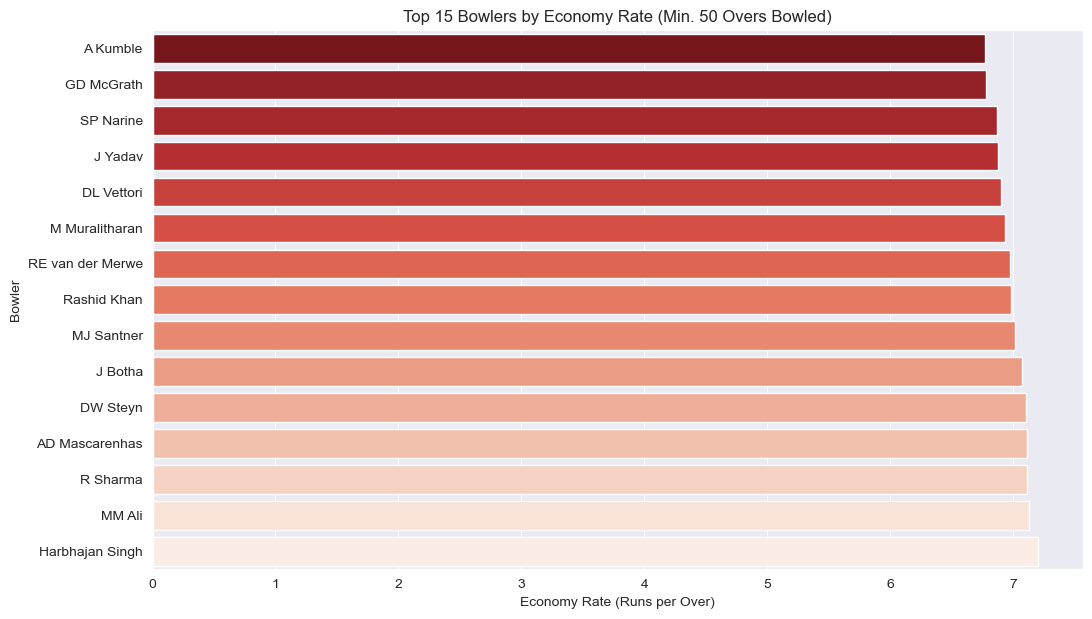

In [29]:
# Best Economy Rates (min. 50 overs bowled)

# Calculate runs conceded and balls bowled per bowler
# Runs conceded includes all runs (batsman + extras)
runs_conceded = deliveries_df.groupby('bowler')['total_runs'].sum()

# Balls bowled excludes wides and no-balls for over calculation
balls_bowled = deliveries_df[~deliveries_df['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')['ball'].count()

# Combine into a DataFrame
bowler_stats = pd.DataFrame({'Runs Conceded': runs_conceded, 'Balls Bowled': balls_bowled})

# Calculate Overs Bowled
bowler_stats['Overs Bowled'] = bowler_stats['Balls Bowled'] / 6

# Filter out bowlers with less than the minimum overs threshold
min_overs_threshold = 50
bowler_stats = bowler_stats[bowler_stats['Overs Bowled'] >= min_overs_threshold]

# Calculate Economy Rate
bowler_stats['Economy Rate'] = bowler_stats['Runs Conceded'] / bowler_stats['Overs Bowled']

# Get top 15 bowlers by economy rate (lowest is best)
top_economy_rates = bowler_stats.sort_values('Economy Rate', ascending=True).nsmallest(15, 'Economy Rate')

# Print the table
print(f"\n\nTop 15 Bowlers by Economy Rate (Min. {min_overs_threshold} Overs Bowled):")
# Format economy rate for printing
top_economy_rates_table = top_economy_rates.copy()
top_economy_rates_table['Economy Rate'] = top_economy_rates_table['Economy Rate'].map('{:.2f}'.format)
top_economy_rates_table['Overs Bowled'] = top_economy_rates_table['Overs Bowled'].map('{:.1f}'.format) # Format overs
print(tabulate(top_economy_rates_table[['Runs Conceded', 'Overs Bowled', 'Economy Rate']], headers='keys', tablefmt='fancy_grid'))


# Plotting
plt.figure(figsize=(12, 7))
# Use a valid palette name like 'Reds_r' (reversed Reds)
sns.barplot(y=top_economy_rates.index, x=top_economy_rates['Economy Rate'], palette='Reds_r', orient='h')
plt.title(f'Top 15 Bowlers by Economy Rate (Min. {min_overs_threshold} Overs Bowled)')
plt.xlabel('Economy Rate (Runs per Over)')
plt.ylabel('Bowler')
plt.show()


##### Most 3-wicket, 4-wicket, and 5-wicket haul




Top 15 Bowlers by Number of 3+ Wicket Hauls:
╒═════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════════╕
│ bowler      │   3-Wkt Hauls │   4-Wkt Hauls │   5-Wkt Hauls │   Total Hauls (3+) │
╞═════════════╪═══════════════╪═══════════════╪═══════════════╪════════════════════╡
│ JJ Bumrah   │            19 │             2 │             3 │                 24 │
├─────────────┼───────────────┼───────────────┼───────────────┼────────────────────┤
│ YS Chahal   │            13 │             6 │             1 │                 20 │
├─────────────┼───────────────┼───────────────┼───────────────┼────────────────────┤
│ SL Malinga  │            12 │             6 │             1 │                 19 │
├─────────────┼───────────────┼───────────────┼───────────────┼────────────────────┤
│ A Mishra    │            12 │             4 │             1 │                 17 │
├─────────────┼───────────────┼───────────────┼───────────────┼────────────────────┤
│ RA Jadeja   │   

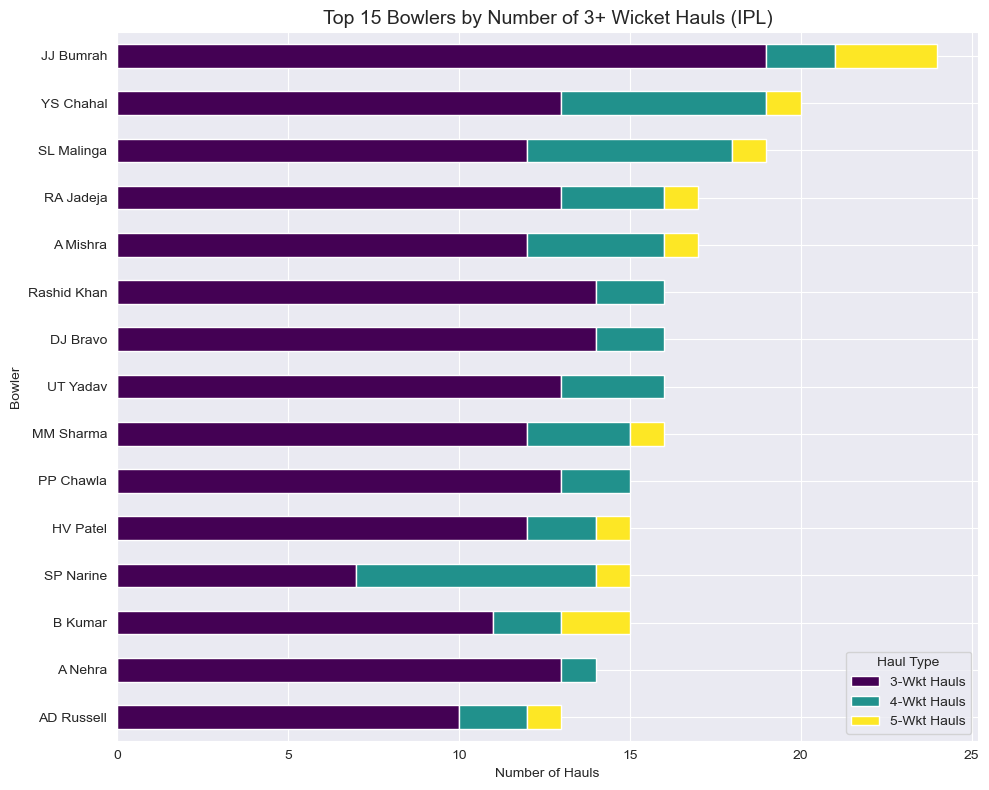

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

wickets_per_match = (
    wickets_df.groupby(["match_id", "bowler"])["is_wicket"].sum().reset_index()
)


def categorize_haul(wickets):
    if wickets >= 5:
        return "5+"
    elif wickets == 4:
        return "4"
    elif wickets == 3:
        return "3"
    else:
        return None  # Ignore < 3 wickets


wickets_per_match["Haul Type"] = wickets_per_match["is_wicket"].apply(categorize_haul)

# --- Filter hauls only ---
hauls_df = wickets_per_match.dropna(subset=["Haul Type"])
bowler_hauls = hauls_df.groupby(["bowler", "Haul Type"]).size().unstack(fill_value=0)

for haul_type in ["3", "4", "5+"]:
    if haul_type not in bowler_hauls.columns:
        bowler_hauls[haul_type] = 0

# Reorder columns and calculate total hauls
bowler_hauls = bowler_hauls[["3", "4", "5+"]]
bowler_hauls["Total Hauls (3+)"] = (
    bowler_hauls["3"] + bowler_hauls["4"] + bowler_hauls["5+"]
)

bowler_hauls_sorted = bowler_hauls.sort_values(
    by=["5+", "4", "3", "Total Hauls (3+)"], ascending=[False, False, False, False]
)
top_bowlers_hauls = bowler_hauls_sorted.nlargest(15, "Total Hauls (3+)")

# Rename for clarity
top_bowlers_hauls.columns = [
    "3-Wkt Hauls",
    "4-Wkt Hauls",
    "5-Wkt Hauls",
    "Total Hauls (3+)",
]

# --- Display table ---
print("\n\nTop 15 Bowlers by Number of 3+ Wicket Hauls:")
print(tabulate(top_bowlers_hauls, headers="keys", tablefmt="fancy_grid"))

# --- Plotting ---
# Sort index for better visual order
top_bowlers_hauls_plot = top_bowlers_hauls.sort_values(
    "Total Hauls (3+)", ascending=True
)

# Plot stacked bar chart
top_bowlers_hauls_plot[["3-Wkt Hauls", "4-Wkt Hauls", "5-Wkt Hauls"]].plot(
    kind="barh", stacked=True, figsize=(10, 8), colormap="viridis"
)

plt.title("Top 15 Bowlers by Number of 3+ Wicket Hauls (IPL)", fontsize=14)
plt.xlabel("Number of Hauls")
plt.ylabel("Bowler")
plt.legend(title="Haul Type", loc="lower right")
plt.tight_layout()
plt.show()

##### Performance in Death Overs (17-20)




Top 15 Bowlers by Death Over Economy Rate (Min. 20 Overs Bowled):
╒══════════════╤═════════════════╤════════════════╤════════════════╕
│ bowler       │   Runs Conceded │   Overs Bowled │   Economy Rate │
╞══════════════╪═════════════════╪════════════════╪════════════════╡
│ DE Bollinger │             214 │           28.2 │           7.6  │
├──────────────┼─────────────────┼────────────────┼────────────────┤
│ SL Malinga   │             925 │          114.8 │           8.06 │
├──────────────┼─────────────────┼────────────────┼────────────────┤
│ SP Narine    │             657 │           79.2 │           8.3  │
├──────────────┼─────────────────┼────────────────┼────────────────┤
│ WD Parnell   │             248 │           29.5 │           8.41 │
├──────────────┼─────────────────┼────────────────┼────────────────┤
│ CH Morris    │             594 │           69.7 │           8.53 │
├──────────────┼─────────────────┼────────────────┼────────────────┤
│ JJ Bumrah    │            1050 │ 

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\1309036340.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_death_economy.index, x=top_death_economy['Economy Rate'], palette='Reds_r', orient='h')


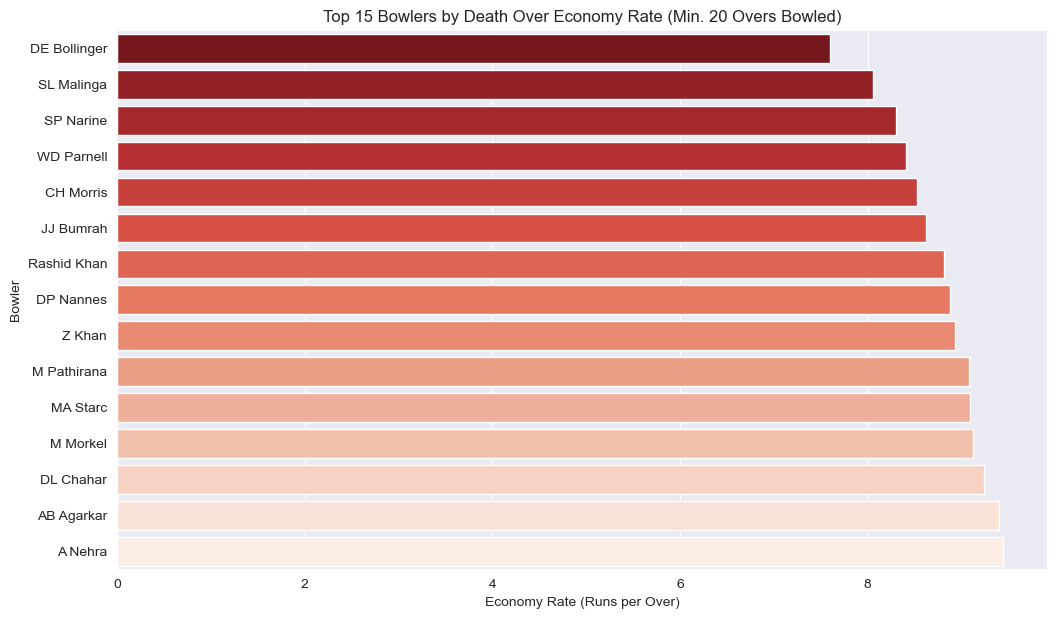

In [31]:
# Performance in Death Overs (17-20)

# Filter deliveries for death overs (over 16 to 19)
death_overs_df = deliveries_df[deliveries_df['over'] > 16]

death_runs_conceded = death_overs_df.groupby('bowler')['total_runs'].sum()
death_balls_bowled = death_overs_df[~death_overs_df['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')['ball'].count()

death_bowler_stats = pd.DataFrame({'Runs Conceded': death_runs_conceded, 'Balls Bowled': death_balls_bowled})

death_bowler_stats['Overs Bowled'] = death_bowler_stats['Balls Bowled'] / 6

min_death_overs_threshold = 20
death_bowler_stats = death_bowler_stats[death_bowler_stats['Overs Bowled'] >= min_death_overs_threshold]

# Calculate Death Over Economy Rate
death_bowler_stats['Economy Rate'] = death_bowler_stats['Runs Conceded'] / death_bowler_stats['Overs Bowled']

# Get top 15 bowlers by death over economy rate (lowest is best)
top_death_economy = death_bowler_stats.sort_values('Economy Rate', ascending=True).nsmallest(15, 'Economy Rate')

# Print the table
print(f"\n\nTop 15 Bowlers by Death Over Economy Rate (Min. {min_death_overs_threshold} Overs Bowled):")
top_death_economy_table = top_death_economy.copy()
top_death_economy_table['Economy Rate'] = top_death_economy_table['Economy Rate'].map('{:.2f}'.format)
top_death_economy_table['Overs Bowled'] = top_death_economy_table['Overs Bowled'].map('{:.1f}'.format) # Format overs
print(tabulate(top_death_economy_table[['Runs Conceded', 'Overs Bowled', 'Economy Rate']], headers='keys', tablefmt='fancy_grid'))


# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(y=top_death_economy.index, x=top_death_economy['Economy Rate'], palette='Reds_r', orient='h')
plt.title(f'Top 15 Bowlers by Death Over Economy Rate (Min. {min_death_overs_threshold} Overs Bowled)')
plt.xlabel('Economy Rate (Runs per Over)')
plt.ylabel('Bowler')
plt.show()



### 2.3 Venue Analysis

- **Average Scores**: Calculate the average first and second innings scores for each venue.
- **Win Rate (Batting First vs Second)**: Analyse if venues favour teams batting first or second.
- **High Scoring Venues**: Identify venues where high scores are frequently achieved.


#### Average Scores



--- Calculating Average Innings Scores for Top 10 Venues ---

--- Average Innings Scores for Top 10 Venues ---
╒══════════════════════════════════════════════╤═════════════════════╤═════════════════════╕
│ venue                                        │   Avg 1st Inn Score │   Avg 2nd Inn Score │
╞══════════════════════════════════════════════╪═════════════════════╪═════════════════════╡
│ Wankhede Stadium                             │             170.254 │             160.059 │
├──────────────────────────────────────────────┼─────────────────────┼─────────────────────┤
│ M Chinnaswamy Stadium                        │             173.191 │             154.903 │
├──────────────────────────────────────────────┼─────────────────────┼─────────────────────┤
│ Eden Gardens                                 │             166.28  │             153.538 │
├──────────────────────────────────────────────┼─────────────────────┼─────────────────────┤
│ MA Chidambaram Stadium                       │   

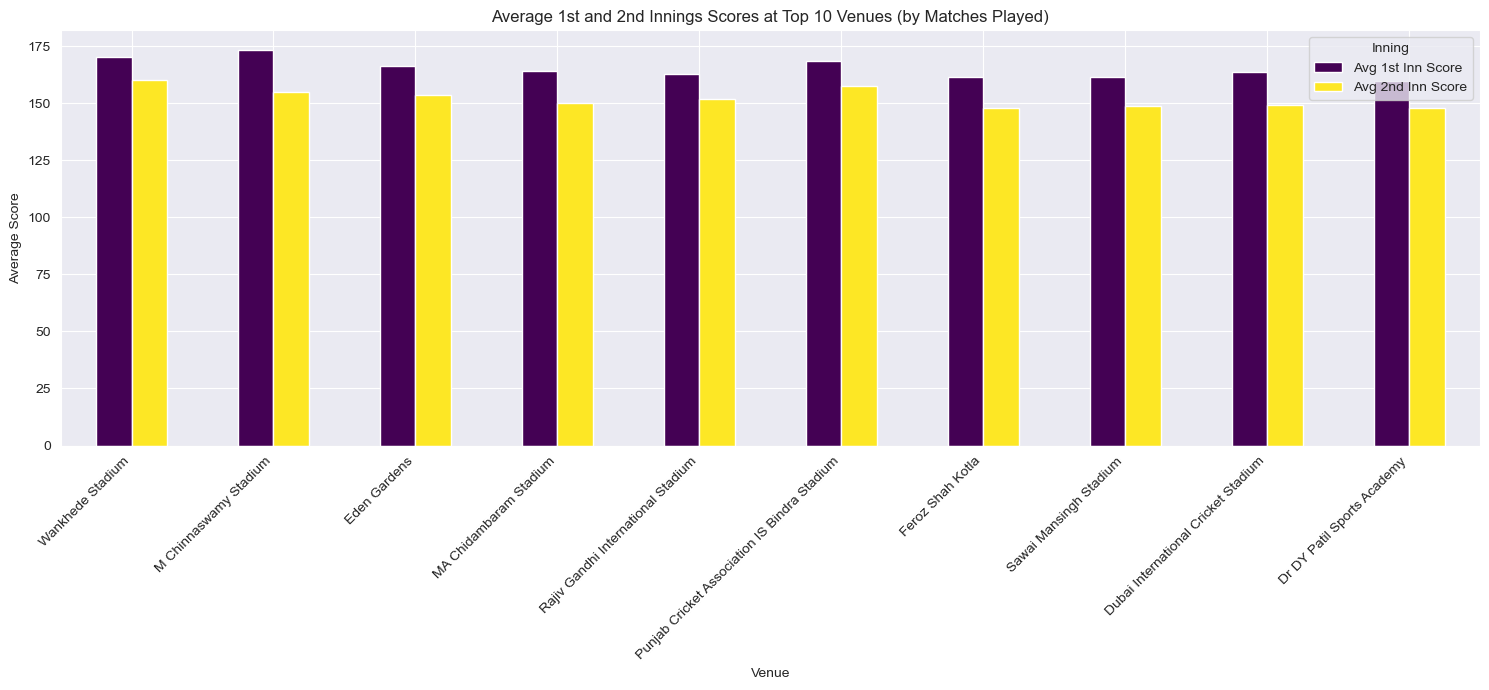

In [32]:
# Calculate the average first and second innings scores per venue

# Ensure merged_df and matches_df are available
if "merged_df" not in locals() or "matches_df" not in locals():
    print(
        "Required DataFrames (merged_df, matches_df) not found. Please run previous cells."
    )
else:
    # 1. Identify Top 10 Venues by matches played
    top_10_venues = matches_df["venue"].value_counts().nlargest(10).index.tolist()

    # 2. Calculate Average Scores (using the logic similar to CELL 36 but filtering first)
    required_cols_avg = ["venue", "inning", "total_runs", "match_id"]
    if not all(col in merged_df.columns for col in required_cols_avg):
        print(
            "\nRequired columns missing in merged_df for average score calculation. Skipping..."
        )
        avg_top_venue_scores = (
            pd.DataFrame()
        )  # Define as empty if calculation can't proceed
    else:
        print("\n--- Calculating Average Innings Scores for Top 10 Venues ---")
        # Filter merged_df for top 10 venues first
        top_venues_df = merged_df[merged_df["venue"].isin(top_10_venues)].copy()

        # Ensure numeric types and handle NaNs
        top_venues_df["inning"] = pd.to_numeric(
            top_venues_df["inning"], errors="coerce"
        )
        top_venues_df["total_runs"] = pd.to_numeric(
            top_venues_df["total_runs"], errors="coerce"
        )
        top_venues_df.dropna(
            subset=["inning", "total_runs", "venue", "match_id"], inplace=True
        )

        # Calculate total runs per inning per match at these venues
        venue_scores_top = (
            top_venues_df[top_venues_df["inning"].isin([1, 2])]
            .groupby(["venue", "match_id", "inning"])["total_runs"]
            .sum()
            .reset_index()
        )

        # Calculate the average score for 1st and 2nd innings
        avg_top_venue_scores = (
            venue_scores_top.groupby(["venue", "inning"])["total_runs"].mean().unstack()
        )

        # Rename columns
        avg_top_venue_scores = avg_top_venue_scores.rename(
            columns={1: "Avg 1st Inn Score", 2: "Avg 2nd Inn Score"}
        )

        # Reindex to match the order of top_10_venues and handle potential missing venues/innings
        avg_top_venue_scores = avg_top_venue_scores.reindex(top_10_venues).dropna()

        print("\n--- Average Innings Scores for Top 10 Venues ---")
        print(
            tabulate(
                avg_top_venue_scores.fillna("N/A"),
                headers="keys",
                tablefmt="fancy_grid",
            )
        )

        # 3. Plotting the average scores for top 10 venues
        if not avg_top_venue_scores.empty:
            avg_top_venue_scores.plot(kind="bar", figsize=(15, 7), colormap="viridis")
            plt.title(
                "Average 1st and 2nd Innings Scores at Top 10 Venues (by Matches Played)"
            )
            plt.xlabel("Venue")
            plt.ylabel("Average Score")
            plt.xticks(rotation=45, ha="right")
            plt.legend(title="Inning")
            plt.tight_layout()
            plt.show()
        else:
            print("\nCannot plot: No average score data calculated for top 10 venues.")

#### Win Rate (Batting First vs Second)



--- Win Rate (Batting First vs Second) at Top 10 Venues ---
╒══════════════════════════════════════════════╤══════════════════╤═══════════════════╤═════════════════╤═══════════════════╤════════════════════╕
│ venue                                        │   Bat First Wins │   Bat Second Wins │   Total Matches │ Bat First Win %   │ Bat Second Win %   │
╞══════════════════════════════════════════════╪══════════════════╪═══════════════════╪═════════════════╪═══════════════════╪════════════════════╡
│ Wankhede Stadium                             │               53 │                64 │             117 │ 45.30%            │ 54.70%             │
├──────────────────────────────────────────────┼──────────────────┼───────────────────┼─────────────────┼───────────────────┼────────────────────┤
│ Eden Gardens                                 │               40 │                53 │              93 │ 43.01%            │ 56.99%             │
├──────────────────────────────────────────────┼─────────

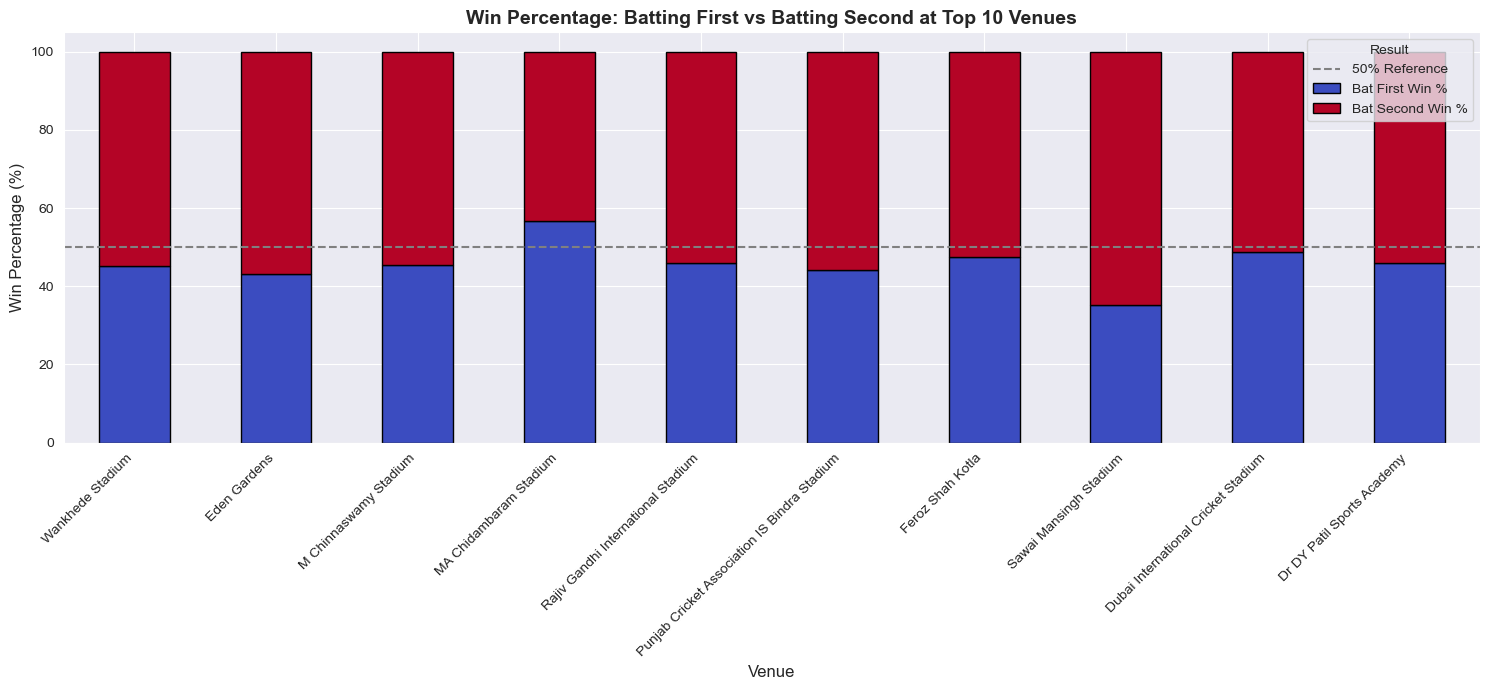

In [33]:
# Analyse if venues favour teams batting first or second

# Ensure top_10_venues is available from the previous cell
if "top_10_venues" not in locals():
    print(
        "Error: 'top_10_venues' not found. Please run the previous cell (Average Scores) first."
    )
else:
    top_venue_matches = matches_df[
        matches_df["venue"].isin(top_10_venues)
        & matches_df["result"].isin(["runs", "wickets"])
    ].copy()

    venue_win_counts = (
        top_venue_matches.groupby(["venue", "result"]).size().unstack(fill_value=0)
    )
    venue_win_counts = venue_win_counts.rename(
        columns={"runs": "Bat First Wins", "wickets": "Bat Second Wins"}
    )
    venue_win_counts["Total Matches"] = (
        venue_win_counts["Bat First Wins"] + venue_win_counts["Bat Second Wins"]
    )

    venue_win_counts["Bat First Win %"] = (
        venue_win_counts["Bat First Wins"] / venue_win_counts["Total Matches"]
    ) * 100
    venue_win_counts["Bat Second Win %"] = (
        venue_win_counts["Bat Second Wins"] / venue_win_counts["Total Matches"]
    ) * 100
    venue_win_counts = venue_win_counts.reindex(top_10_venues).sort_values(
        "Total Matches", ascending=False
    )

    print("\n--- Win Rate (Batting First vs Second) at Top 10 Venues ---")

    # Format table for display
    venue_win_table = venue_win_counts[
        [
            "Bat First Wins",
            "Bat Second Wins",
            "Total Matches",
            "Bat First Win %",
            "Bat Second Win %",
        ]
    ].copy()
    venue_win_table["Bat First Win %"] = venue_win_table["Bat First Win %"].map(
        "{:.2f}%".format
    )
    venue_win_table["Bat Second Win %"] = venue_win_table["Bat Second Win %"].map(
        "{:.2f}%".format
    )

    # Display table
    from tabulate import tabulate

    print(tabulate(venue_win_table, headers="keys", tablefmt="fancy_grid"))

    # Plotting the stacked bar chart with 50% reference line
    if not venue_win_counts.empty:
        ax = venue_win_counts[["Bat First Win %", "Bat Second Win %"]].plot(
            kind="bar",
            stacked=True,
            figsize=(15, 7),
            colormap="coolwarm",
            edgecolor="black",
        )

        # Add title and labels
        plt.title(
            "Win Percentage: Batting First vs Batting Second at Top 10 Venues",
            fontsize=14,
            weight="bold",
        )
        plt.xlabel("Venue", fontsize=12)
        plt.ylabel("Win Percentage (%)", fontsize=12)

        # Add horizontal 50% reference line
        plt.axhline(
            y=50, color="gray", linestyle="--", linewidth=1.5, label="50% Reference"
        )

        # Format ticks and legend
        plt.xticks(rotation=45, ha="right", fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(title="Result", fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print("\nCannot plot: No win rate data calculated for top 10 venues.")

#### High Scoring Venues



--- Number of Innings with Score >= 200 at Top 10 Venues ---
╒══════════════════════════════════════════════╤══════════════════╕
│ Venue                                        │   Innings >= 200 │
╞══════════════════════════════════════════════╪══════════════════╡
│ M Chinnaswamy Stadium                        │               30 │
├──────────────────────────────────────────────┼──────────────────┤
│ Wankhede Stadium                             │               26 │
├──────────────────────────────────────────────┼──────────────────┤
│ MA Chidambaram Stadium                       │               23 │
├──────────────────────────────────────────────┼──────────────────┤
│ Eden Gardens                                 │               22 │
├──────────────────────────────────────────────┼──────────────────┤
│ Rajiv Gandhi International Stadium           │               19 │
├──────────────────────────────────────────────┼──────────────────┤
│ Punjab Cricket Association IS Bindra Stadium │      

C:\Users\ostsa\AppData\Local\Temp\ipykernel_33772\1702375430.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


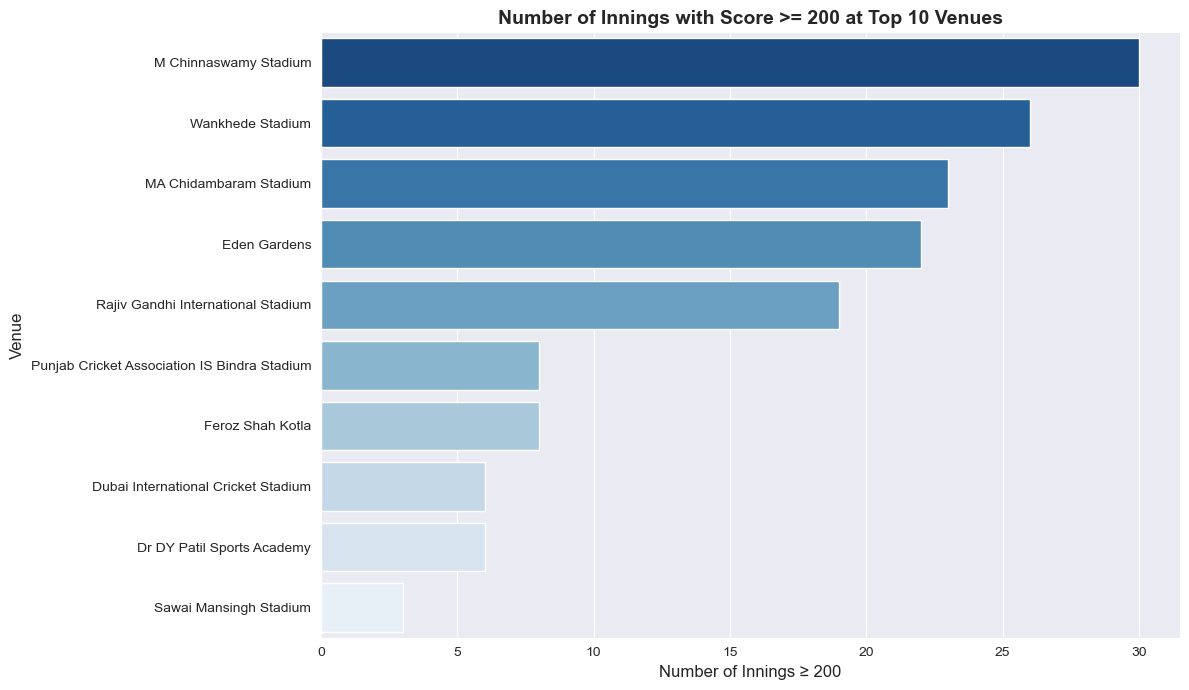

In [34]:
# Identify venues where high scores are frequently achieved

# Define a threshold for a high score (e.g., 200 runs)
high_score_threshold = 200

# Ensure merged_df and top_10_venues are available
if "merged_df" not in locals() or "top_10_venues" not in locals():
    print(
        "Required data (merged_df or top_10_venues) not found. Please run previous cells."
    )
else:
    innings_scores = (
        merged_df.groupby(["venue", "match_id", "inning"])["total_runs"]
        .sum()
        .reset_index()
    )

    high_scoring_innings = innings_scores[
        innings_scores["total_runs"] >= high_score_threshold
    ]
    high_score_venue_counts = high_scoring_innings["venue"].value_counts()
    high_score_venue_counts_top10 = (
        high_score_venue_counts.reindex(top_10_venues)
        .fillna(0)
        .astype(int)
        .sort_values(ascending=False)
    )

    # Print summary table
    print(
        f"\n--- Number of Innings with Score >= {high_score_threshold} at Top 10 Venues ---"
    )
    high_score_table = high_score_venue_counts_top10.reset_index()
    high_score_table.columns = ["Venue", f"Innings >= {high_score_threshold}"]
    from tabulate import tabulate

    print(
        tabulate(
            high_score_table, headers="keys", tablefmt="fancy_grid", showindex=False
        )
    )

    # Plot the results
    if not high_score_venue_counts_top10.empty:
        plt.figure(figsize=(12, 7))
        sns.barplot(
            y=high_score_venue_counts_top10.index,
            x=high_score_venue_counts_top10.values,
            palette="Blues_r",
            orient="h",
        )
        plt.title(
            f"Number of Innings with Score >= {high_score_threshold} at Top 10 Venues",
            fontsize=14,
            weight="bold",
        )
        plt.xlabel(f"Number of Innings ≥ {high_score_threshold}", fontsize=12)
        plt.ylabel("Venue", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print(
            f"\nNo innings with scores >= {high_score_threshold} found in the top 10 venues."
        )